## **Task 1 - Bank Statements (P1- BankStatements.json)**

1.  Transaction Analysis:
   - What is the total number of transactions made over the year?
   - What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)
   - Analyze the frequency of different transaction types (debit vs. credit).

2.  Balance Analysis:
   - What is the trend of the account balance over time?
   - Identify any periods with significant changes in the account balance.

3.  Spending Patterns:
   - What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
   - Analyze the frequency and amount of spending in each category.

4.  Income Analysis:
   - What are the main sources of income (e.g., salary, UPI credits)?
   - Identify any patterns in the timing and amount of income received.

5.  Alert Generation:
   - Identify any unusual or suspicious transactions.
   - Generate alerts for low balance or high expenditure periods.


In [594]:
import pandas as pd
import json

In [595]:
bank_data = pd.read_json('P1- BankStatements.json')

In [596]:
# Inspect the data
bank_data.head(10)

,Account
Profile,"{'Holders': {'type': 'SINGLE', 'Holder': {'nam..."
Summary,"{'currentBalance': '761.41', 'currency': 'INR'..."
Transactions,"{'startDate': '2023-05-31', 'endDate': '2024-0..."
linkedAccRef,02f28b8d-d8a3-43d7-88c6-5fabb2e51541
maskedAccNumber,XXXX6461
type,deposit
version,1.1
xmlns,http://api.rebit.org.in/FISchema/deposit
xmlns:xsi,http://www.w3.org/2001/XMLSchema-instance
xsi:schemaLocation,http://api.rebit.org.in/FISchema/deposit.xsd


In [597]:
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Profile to xsi:schemaLocation
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Account  10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes
None


In [598]:
transactions = bank_data['Account']['Transactions']

In [599]:
transactions = pd.DataFrame(transactions['Transaction'])

In [600]:
transactions.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


In [601]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


# **Transaction Analysis**

In [602]:
transactions['amount'] = transactions['amount'].astype(float)

**1. Total Number of Transactions**

In [603]:
# Total number of transactions
total_transactions = len(transactions)
print("Total number of transactions:", total_transactions)

Total number of transactions: 985


**2. Distribution of Transaction Amounts**

In [604]:
# Define small and large transactions (example: small < $100, large >= $100)
small_transactions = transactions[transactions['amount'] < 100]
large_transactions = transactions[transactions['amount'] >= 100]

In [605]:
small_transactions.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
5,DEBIT,UPI,1.0,524.80,2023-08-22T08:05:06+05:30,2023-08-22,S82724622,UPI/323444770475/080506/UPI/8795417446ybl/Paym,NA
15,DEBIT,UPI,80.0,4754.80,2023-08-24T21:43:55+05:30,2023-08-24,S92519516,UPI/323600260769/214354/UPI/BHARATPE90725406876,NA
16,DEBIT,UPI,30.0,4724.80,2023-08-24T21:48:01+05:30,2023-08-24,S92652956,UPI/323633683779/214801/UPI/Q057618043ybl/Paym,NA
21,CREDIT,OTHERS,1.0,1155.80,2023-08-25T16:04:31+05:30,2023-08-25,S16470419,IMPS/P2A/323716492303/PHONEPEPRIVATEL/IMPSAXB9111,NA


In [606]:
large_transactions.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
6,CREDIT,UPI,3000.0,3524.80,2023-08-22T11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA


In [607]:
# Distribution of transaction amounts
print("Transaction amount distribution:\n")
transactions['amount'].describe()


Transaction amount distribution:



count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64

**3. Frequency of Different Transaction Types**

In [608]:
# Frequency of different transaction types (debit vs. credit)
print("Transaction types frequency:\n")
transactions['type'].value_counts()

Transaction types frequency:



type
DEBIT     695
CREDIT    290
Name: count, dtype: int64

# **Balance Analysis**

**1. Account Balance Over Time**

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns

In [610]:
# Trend of the account balance over time
transactions['valueDate'] = pd.to_datetime(transactions['valueDate'])
transactions = transactions.sort_values(by='valueDate')

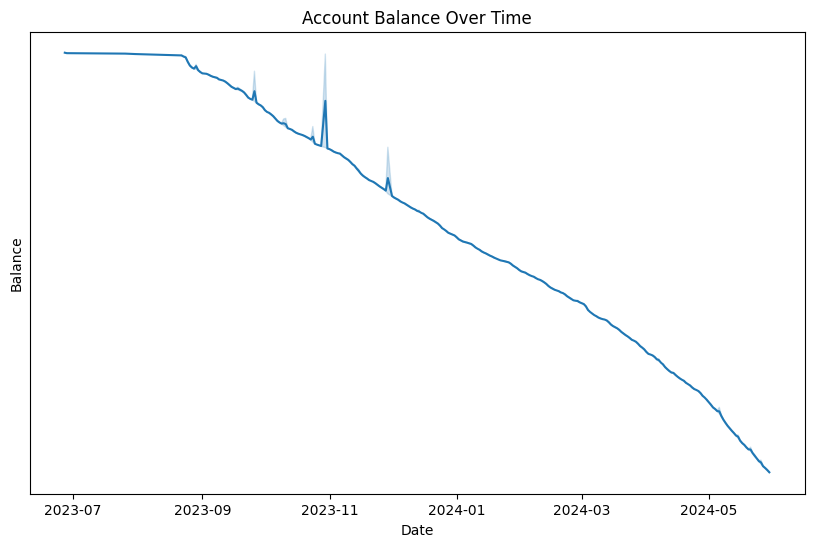

In [611]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=transactions['valueDate'], y=transactions['currentBalance'])
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.yticks([])
plt.show()

**2. Changes in the Account Balance**

In [612]:
transactions['currentBalance'] = transactions['currentBalance'].astype(float)

In [613]:
# Identify periods with significant changes in account balance
# Calculate the difference in account balance between consecutive transactions
transactions['balance_diff'] = transactions['currentBalance'].diff().fillna(0)

In [614]:
# Identify transactions where the absolute change in balance is greater than the standard deviation of all balance changes
significant_changes = transactions[abs(transactions['balance_diff']) > transactions['balance_diff'].std()]
print("Periods with significant changes in balance:\n")
significant_changes[['valueDate', 'currentBalance', 'balance_diff']]

Periods with significant changes in balance:



,valueDate,currentBalance,balance_diff
78,2023-09-14,6339.80,5500.0
102,2023-09-22,2091.80,-5560.0
99,2023-09-22,3131.80,-4470.0
136,2023-10-01,6238.80,4541.0
135,2023-10-01,1688.80,-4549.0
265,2023-11-12,10560.80,4380.0
280,2023-11-14,24971.80,18841.0
276,2023-11-14,43891.80,18500.0
277,2023-11-14,27391.80,-16500.0
274,2023-11-14,5893.80,-21498.0


# **Spending Patterns**

In [615]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 984
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   type                  985 non-null    object        
 1   mode                  985 non-null    object        
 2   amount                985 non-null    float64       
 3   currentBalance        985 non-null    float64       
 4   transactionTimestamp  985 non-null    object        
 5   valueDate             985 non-null    datetime64[ns]
 6   txnId                 985 non-null    object        
 7   narration             985 non-null    object        
 8   reference             985 non-null    object        
 9   balance_diff          985 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 84.6+ KB


**1. Main Categories of Expenses**

In [616]:
# Main categories of expenses
#Type as DEBIT
expense_categories = transactions[transactions['type']=='DEBIT']['mode'].value_counts()
print("Expense categories:\n", expense_categories)

Expense categories:
 mode
UPI     688
CARD      4
ATM       3
Name: count, dtype: int64


**2. Frequency and Amount of Spending in Each Category**

In [617]:
# Frequency and amount of spending in each category in DEBIT Type
category_spending = transactions[transactions['type'] == 'DEBIT'].groupby('mode')['amount'].agg(['count', 'sum'])
print("Spending in each category:\n", category_spending)

Spending in each category:
       count       sum
mode                 
ATM       3   13500.0
CARD      4     830.0
UPI     688  407759.9


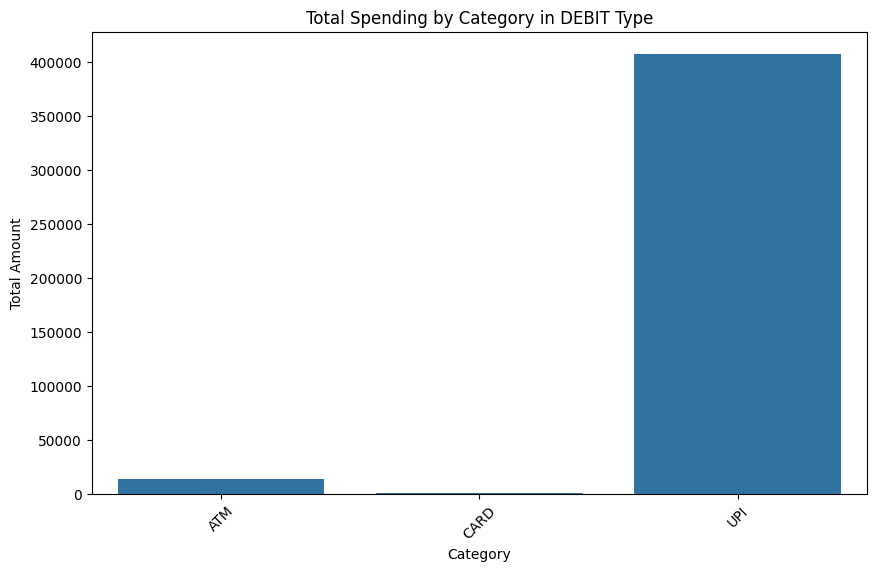

In [618]:
# Plotting the spending distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_spending.index, y=category_spending['sum'])
plt.title('Total Spending by Category in DEBIT Type')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [619]:
#Type as CREDIT
expense_categories = transactions[transactions['type']=='CREDIT']['mode'].value_counts()
print("Expense categories:\n", expense_categories)

Expense categories:
 mode
OTHERS    188
UPI       101
CASH        1
Name: count, dtype: int64


In [620]:
# Frequency and amount of spending in each category in CREDIT Type
category_spending = transactions[transactions['type'] == 'CREDIT'].groupby('mode')['amount'].agg(['count', 'sum'])
print("Spending in each category:\n", category_spending)

Spending in each category:
         count        sum
mode                    
CASH        1   45000.00
OTHERS    188  196237.51
UPI       101  179333.00


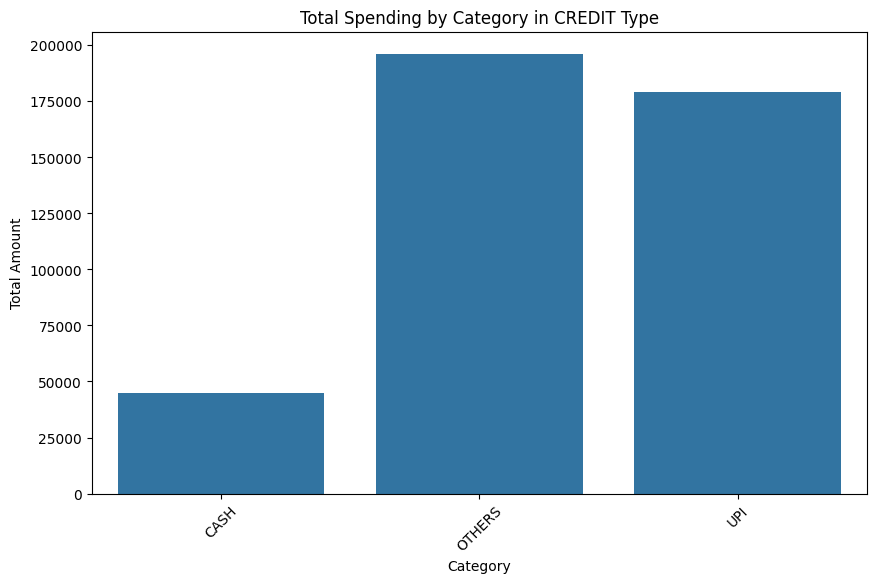

In [621]:
# Plotting the spending distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_spending.index, y=category_spending['sum'])
plt.title('Total Spending by Category in CREDIT Type')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# **Income Analysis**

**1. Main Sources of Income**

In [622]:
# Main sources of income
#Type as DEBIT
income_sources = transactions[transactions['type'] == 'DEBIT']['mode'].value_counts()
print("Income sources:\n", income_sources)

Income sources:
 mode
UPI     688
CARD      4
ATM       3
Name: count, dtype: int64


In [623]:
#Type as CREDIT
income_sources = transactions[transactions['type'] == 'CREDIT']['mode'].value_counts()
print("Income sources:\n", income_sources)

Income sources:
 mode
OTHERS    188
UPI       101
CASH        1
Name: count, dtype: int64


**2. Patterns in the Timing and Amount of Income Received**

In [624]:
# Timing and amount of income received in DEBIT Type
debit_income_timing = transactions[transactions['type'] == 'DEBIT'].groupby('valueDate')['amount'].sum()
print("Income received over time:\n", debit_income_timing)

Income received over time:
 valueDate
2023-06-27     100.0
2023-06-28     170.0
2023-07-26     500.0
2023-08-07    1000.0
2023-08-22       1.0
               ...  
2024-05-26     736.0
2024-05-27     635.0
2024-05-28     260.0
2024-05-29     695.9
2024-05-30     200.0
Name: amount, Length: 257, dtype: float64


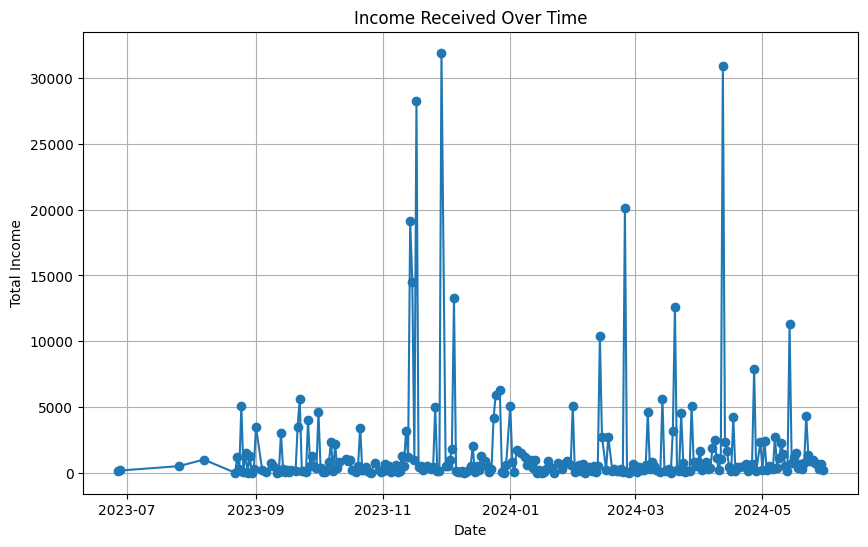

In [625]:
# Plotting the income over time
plt.figure(figsize=(10, 6))
plt.plot(debit_income_timing.index,debit_income_timing.values, marker='o')
plt.title('Income Received Over Time')
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()


In [626]:
# Timing and amount of income received in CREDIT Type
credit_income_timing = transactions[transactions['type'] == 'CREDIT'].groupby('valueDate')['amount'].sum()
print("Income received over time:\n", credit_income_timing)

Income received over time:
 valueDate
2023-07-31      15.0
2023-08-22    3300.0
2023-08-23     400.0
2023-08-24    1950.0
2023-08-25     554.0
               ...  
2024-05-24     600.0
2024-05-25    1600.0
2024-05-28     210.0
2024-05-29     450.0
2024-05-30     938.0
Name: amount, Length: 205, dtype: float64


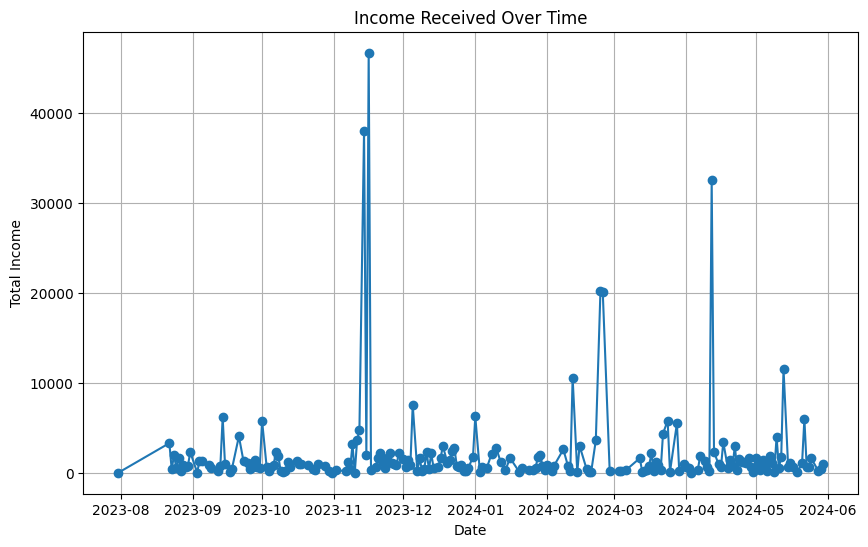

In [627]:
# Plotting the income over time
plt.figure(figsize=(10, 6))
plt.plot(credit_income_timing.index, credit_income_timing.values, marker='o')
plt.title('Income Received Over Time')
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()


# **Alert Generation**

**1. Unusual or Suspicious Transactions**

In [628]:
# Unusual or suspicious transactions
threshold = 1000  # Example threshold for unusual transactions
unusual_transactions = transactions[abs(transactions['amount']) > threshold]
print("Unusual transactions:\n", unusual_transactions)

Unusual transactions:
        type    mode  amount  currentBalance       transactionTimestamp  \
6    CREDIT     UPI  3000.0         3524.80  2023-08-22T11:49:13+05:30   
8     DEBIT     UPI  1200.0         2624.80  2023-08-23T08:17:48+05:30   
17    DEBIT     UPI  2480.0         2244.80  2023-08-25T10:24:38+05:30   
18    DEBIT     UPI  1450.0          794.80  2023-08-25T10:39:35+05:30   
36    DEBIT     UPI  1499.0          315.80  2023-08-27T12:19:54+05:30   
..      ...     ...     ...             ...                        ...   
911   DEBIT     UPI  1300.0         1259.31  2024-05-17T18:51:36+05:30   
925  CREDIT  OTHERS  1070.0         1119.31  2024-05-21T05:47:33+05:30   
936   DEBIT     UPI  3920.0         2165.31  2024-05-22T20:25:35+05:30   
935  CREDIT     UPI  3920.0         6085.31  2024-05-22T20:21:48+05:30   
930  CREDIT  OTHERS  2050.0         2454.31  2024-05-22T04:42:07+05:30   

     valueDate      txnId                                          narration  \
6   2023

**2. Alerts for Low Balance or High Expenditure Periods**

In [629]:
# Generate alerts for low balance or high expenditure periods
low_balance_threshold = 500
high_expenditure_threshold = 2000

In [630]:
low_balance_alerts = transactions[transactions['currentBalance'] < low_balance_threshold]
high_expenditure_alerts = transactions[transactions['amount'] > high_expenditure_threshold]

In [631]:
print("Low balance alerts:\n", low_balance_alerts)
print("High expenditure alerts:\n", high_expenditure_alerts)

Low balance alerts:
        type    mode  amount  currentBalance       transactionTimestamp  \
27    DEBIT     UPI    30.0          145.80  2023-08-25T18:23:59+05:30   
26    DEBIT     UPI  1000.0          175.80  2023-08-25T16:56:59+05:30   
28   CREDIT  OTHERS    51.0          196.80  2023-08-25T18:37:02+05:30   
29    DEBIT     UPI     1.0          195.80  2023-08-26T15:06:16+05:30   
36    DEBIT     UPI  1499.0          315.80  2023-08-27T12:19:54+05:30   
..      ...     ...     ...             ...                        ...   
975  CREDIT  OTHERS   150.0          419.31  2024-05-29T06:03:44+05:30   
976   DEBIT     UPI   240.9          178.41  2024-05-29T08:53:10+05:30   
977   DEBIT     UPI   130.0           48.41  2024-05-29T12:01:51+05:30   
978  CREDIT     UPI   300.0          348.41  2024-05-29T17:10:42+05:30   
979   DEBIT     UPI   245.0          103.41  2024-05-29T17:12:19+05:30   

     valueDate      txnId                                          narration  \
27  2023-0

## **Task 2 - Office Supplies Data (P2- OfficeSupplies Data.csv)**

1. Sales Analysis:
   - What are the total sales for each product category?
   - Which product category has the highest sales?
   - Identify the top 10 best-selling products.

2.  Customer Analysis:
   - Who are the top 10 customers by sales?
   - What is the total number of unique customers?
   - Analyze customer purchase frequency.

3.  Time Series Analysis:
   - What are the monthly sales trends over the past year?
   - Identify any seasonal patterns in the sales data.

4.  Geographical Analysis:
   - Which regions generate the most sales?
   - What are the sales trends across different regions?

5.  Profit Analysis:
   - What is the total profit for each product category?
   - Identify the top 10 most profitable products.



In [632]:
supply = pd.read_csv('P2- OfficeSupplies Data.csv')

In [633]:
supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [634]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [635]:
supply.describe()

,Units,Unit Price
count,43.000000,43.000000
mean,49.325581,20.308605
std,30.078248,47.345118
min,2.000000,1.290000
25%,27.500000,3.990000
50%,53.000000,4.990000
75%,74.500000,17.990000
max,96.000000,275.000000


# **Sales Analysis**

**1. Total Sales for Each Product Category**

In [636]:
# Calculate total sales for each product category
supply['Total Sales'] = supply['Units'] * supply['Unit Price']
total_sales_category = supply.groupby('Item')['Total Sales'].sum()
print("Total Sales for Each Product Category:\n", total_sales_category)

Total Sales for Each Product Category:
 Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Total Sales, dtype: float64


In [637]:
supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Sales
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


**2. Highest Sales of Product Category**

In [638]:
# Identify the product category with the highest sales
highest_sales_category = total_sales_category.idxmax()
highest_sales_amount = total_sales_category.max()
print(f"Product Category with the Highest Sales: {highest_sales_category} (${highest_sales_amount})")


Product Category with the Highest Sales: Binder ($9577.65)


**3. Top 10 Best-Selling Products**

In [639]:
# Identify the top 10 best-selling products
top_10_products = supply.groupby('Item')['Units'].sum().nlargest(10)
print("Top 10 Best-Selling Products:")
print(top_10_products)


Top 10 Best-Selling Products:
Item
Binder     722
Pencil     716
Pen Set    395
Pen        278
Desk        10
Name: Units, dtype: int64


# **Customer Analysis**

In [640]:
supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Sales
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


**1. Top 10 Customers By Sales**

In [641]:
# Identify the top 10 customers by sales
top_10_customers = supply.groupby('Rep')['Total Sales'].sum().nlargest(10)
print("Top 10 Customers by Sales:")
print(top_10_customers)

Top 10 Customers by Sales:
Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Total Sales, dtype: float64


**2. Total Number of Unique Customers**

In [642]:
# Calculate the total number of unique customers
total_unique_customers = supply['Rep'].nunique()
print(f"Total Number of Unique Customers: {total_unique_customers}")

Total Number of Unique Customers: 11


**3. Customer Purchase Frequency**

In [643]:
# Analyze customer purchase frequency
customer_purchase_frequency = supply['Rep'].value_counts()
print("Customer Purchase Frequency:")
print(customer_purchase_frequency)

Customer Purchase Frequency:
Rep
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: count, dtype: int64


# **Time Series Analysis**

In [644]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderDate    43 non-null     object 
 1   Region       43 non-null     object 
 2   Rep          43 non-null     object 
 3   Item         43 non-null     object 
 4   Units        43 non-null     int64  
 5   Unit Price   43 non-null     float64
 6   Total Sales  43 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.5+ KB


**1. Monthly Sales Trends Over the Past Year**

In [645]:
# Convert the date column to datetime
supply['OrderDate'] = pd.to_datetime(supply['OrderDate'])

<ipython-input-645-5e5ff4bdf2bf>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supply['OrderDate'] = pd.to_datetime(supply['OrderDate'])


In [646]:
#Extract the year and month for grouping
supply['year_month'] = supply['OrderDate'].dt.to_period('M')

In [647]:
# Calculate monthly sales trends
monthly_sales_trends = supply.groupby('year_month')['Total Sales'].sum()
print("Monthly Sales Trends Over the Past Year:")
print(monthly_sales_trends)

Monthly Sales Trends Over the Past Year:
year_month
2014-07    2673.23
2014-08    2005.55
2014-09     666.11
2014-10    1984.57
2014-11     833.78
2014-12    3288.47
2015-01    1602.09
2015-02    2044.33
2015-03     556.87
2015-04    1059.03
2015-05    1300.35
2015-06    1613.50
Freq: M, Name: Total Sales, dtype: float64


**2. Seasonal Patterns in Sales Data**

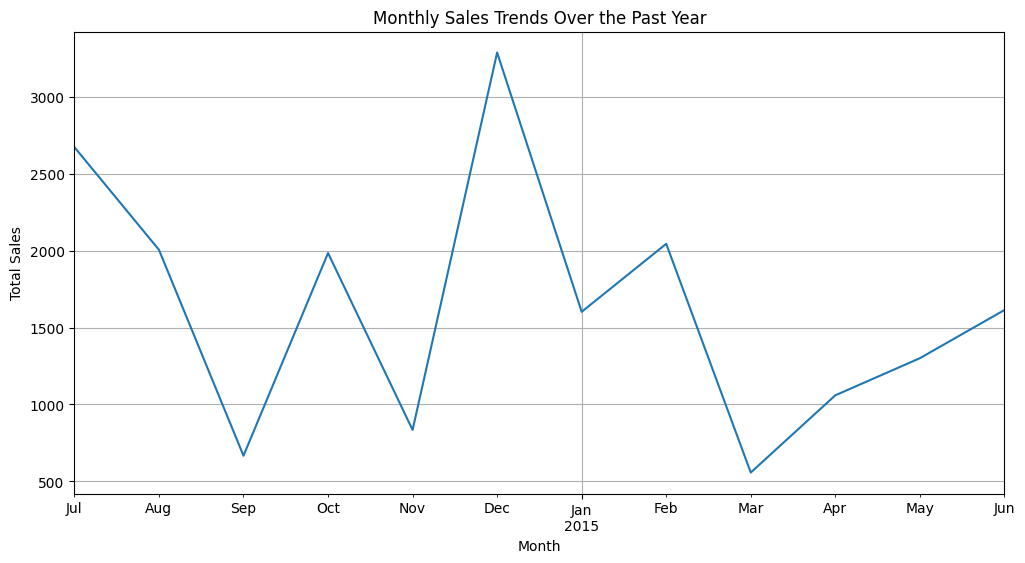

In [648]:
# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales_trends.plot(kind='line')
plt.title('Monthly Sales Trends Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# **Geographical Analysis**

In [649]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderDate    43 non-null     datetime64[ns]
 1   Region       43 non-null     object        
 2   Rep          43 non-null     object        
 3   Item         43 non-null     object        
 4   Units        43 non-null     int64         
 5   Unit Price   43 non-null     float64       
 6   Total Sales  43 non-null     float64       
 7   year_month   43 non-null     period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 2.8+ KB


**1. Regions Generating the Most Sales**

In [650]:
# Calculate sales by region
sales_by_region = supply.groupby('Region')['Total Sales'].sum()
print("Sales by Region:")
print(sales_by_region)

Sales by Region:
Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64


In [651]:
# Calculate monthly sales trends for each region
regional_monthlysales = supply.groupby(['Region', 'year_month'])['Total Sales'].sum().unstack('Region')
print("Sales Trends Across Different Regions:")
print(regional_monthlysales)


Sales Trends Across Different Regions:
Region      Central     East     West
year_month                           
2014-07      686.95  1986.28      NaN
2014-08     1005.90   174.65   825.00
2014-09      259.03   255.84   151.24
2014-10      269.78   575.36  1139.43
2014-11      533.93   299.85      NaN
2014-12     2105.21  1183.26      NaN
2015-01     1413.04   189.05      NaN
2015-02     2024.37    19.96      NaN
2015-03      249.50      NaN   307.37
2015-04      280.59   778.44      NaN
2015-05     1236.67      NaN    63.68
2015-06     1074.10   539.40      NaN


**2. Sales Trends Across Different Regions**

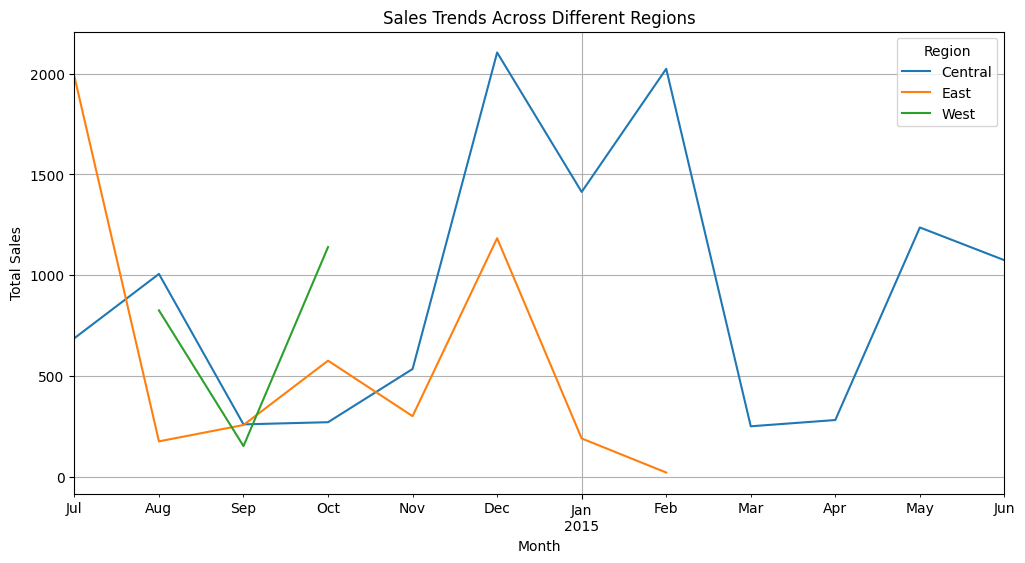

In [652]:
# Plot sales trends across different regions
regional_monthlysales.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trends Across Different Regions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# **Profit Analysis**

In [653]:
supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Sales,year_month
0,2014-07-04,East,Richard,Pen Set,62,4.99,309.38,2014-07
1,2014-07-12,East,Nick,Binder,29,1.99,57.71,2014-07
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2014-07
3,2014-07-29,East,Susan,Binder,81,19.99,1619.19,2014-07
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90,2014-08


**1. Total Profit for Each Product Category**

In [654]:
supply['Cost Price'] = supply['Unit Price'] * 0.8  # assuming cost price is 80% of the unit price
supply['Profit'] = supply['Units'] * (supply['Unit Price'] - supply['Cost Price'])

In [655]:
total_profit = supply.groupby('Item')['Profit'].sum()
print("Total Profit for Each Product Category:\n", total_profit)

Total Profit for Each Product Category:
 Item
Binder     1915.530
Desk        340.000
Pen         409.044
Pen Set     833.974
Pencil      427.028
Name: Profit, dtype: float64


**2. Top 10 Most Profitable Products**

In [656]:
#Top 10 Most Profitable Products
top_10_profit = total_profit.nlargest(10)
print("Top 10 Most Profitable Products:\n", top_10_profit)

Top 10 Most Profitable Products:
 Item
Binder     1915.530
Pen Set     833.974
Pencil      427.028
Pen         409.044
Desk        340.000
Name: Profit, dtype: float64


## **Task 3 - Churn Modelling Data (P3- Churn-Modelling Data.xlsx)**

1.  Customer Demographics:
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.

2.  Churn Analysis:
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.

3.  Product Usage:
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.

4.  Financial Analysis:
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.

5.  Predictive Modeling:
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.



In [657]:
churn = pd.read_excel('P3- Churn-Modelling Data.xlsx')

In [658]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [659]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [660]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Customer Demographics**

**1. Distribution of Customers across Different Age Groups**

In [661]:
# Define age groups
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

In [662]:
# Categorize customers into age groups
churn['AgeGroup'] = pd.cut(churn['Age'], bins=age_bins, labels=age_labels, right=False)

In [663]:
# Calculate distribution of customers across age groups
age_group = churn['AgeGroup'].value_counts().sort_index()
print("Distribution of Customers Across Different Age Groups:")
print(age_group)

Distribution of Customers Across Different Age Groups:
AgeGroup
0-20       49
20-30    1592
30-40    4346
40-50    2618
50-60     869
60+       526
Name: count, dtype: int64


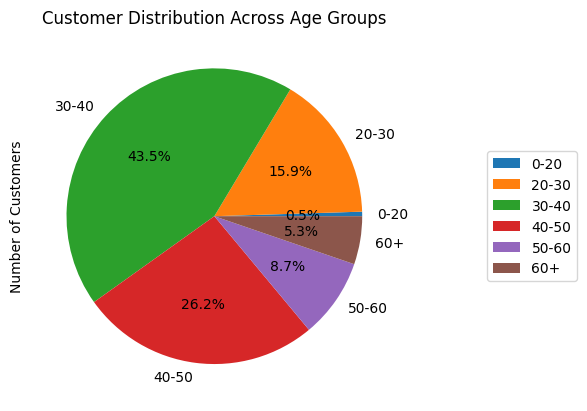

In [664]:
# Plotting
age_group.plot(kind='pie', autopct='%1.1f%%',title='Customer Distribution Across Age Groups', xlabel='Age Group', ylabel='Number of Customers')
plt.legend(loc='center right',bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**2. Gender Distribution of Customers**

In [665]:
gender_distribution = churn['Gender'].value_counts()
print("Gender Distribution of Customers:")
print(gender_distribution)

Gender Distribution of Customers:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


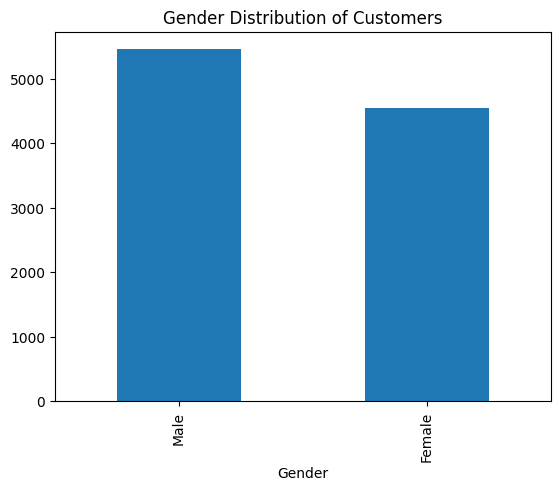

In [666]:
# Plotting
gender_distribution.plot(kind='bar', title='Gender Distribution of Customers')
plt.show()

# **Churn Analysis**

**1. Percentage of Customers Who Have Churned**

In [667]:
churn_percentage = (churn['churned'].mean()) * 100
print(f"Percentage of Customers Who Have Churned: {churn_percentage:.2f}%")

Percentage of Customers Who Have Churned: 20.37%


**2. Main Reasons for Customer Churn**

In [668]:
#Analyzing churn reasons based on demographic factors

## Analyzing churn by gender
gender_churn = churn.groupby('Gender')['churned'].mean()

print("Churn Rate by Gender:")
print(gender_churn)

Churn Rate by Gender:
Gender
Female    0.250715
Male      0.164559
Name: churned, dtype: float64


In [669]:
# Analyzing churn by age group
age_churn = churn.groupby('Age')['churned'].mean().sort_values(ascending=False)

print("Churn rates by Age:")
print(age_churn)

Churn rates by Age:
Age
56    0.714286
52    0.627451
54    0.607143
55    0.585366
51    0.554622
        ...   
83    0.000000
75    0.000000
85    0.000000
88    0.000000
92    0.000000
Name: churned, Length: 70, dtype: float64


In [670]:
# Analyzing churn by geography
geo_churn = churn.groupby('Geography')['churned'].mean()


print("\nChurn rates by Geography:")
print(geo_churn)


Churn rates by Geography:
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churned, dtype: float64


In [671]:
# Analyzing churn reasons based on product usage
churn_by_products = churn.groupby('NumOfProducts')['churned'].mean()
print("Churn Rate by Number of Products Used:")
print(churn_by_products)


Churn Rate by Number of Products Used:
NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churned, dtype: float64


In [672]:
# Analyzing churn by number of Active Member
active_churn = churn.groupby('IsActiveMember')['churned'].mean()

print("Churn rates by Number of Active Member:")
print(active_churn)


Churn rates by Number of Active Member:
IsActiveMember
0    0.268509
1    0.142691
Name: churned, dtype: float64


**3. Patterns or Trends Among Customers Who Have Churned**

In [673]:
# Analyzing age distribution of churned customers
age_distribution_churned = churn[churn['churned'] == 1]['Age'].value_counts().sort_index()
print("Age Distribution of Churned Customers:")
print(age_distribution_churned)

Age Distribution of Churned Customers:
Age
18     2
19     1
20     2
21     3
22    12
23     6
24    14
25     6
26    14
27    13
28    23
29    28
30    24
31    33
32    32
33    44
34    33
35    57
36    53
37    62
38    63
39    72
40    89
41    69
42    77
43    88
44    73
45    87
46    91
47    77
48    80
49    75
50    71
51    66
52    64
53    40
54    51
55    48
56    50
57    38
58    29
59    30
60    32
61    21
62    21
63    18
64    12
65     8
66     7
67     5
68     6
69     2
70     4
71     7
72     1
73     1
74     1
84     1
Name: count, dtype: int64


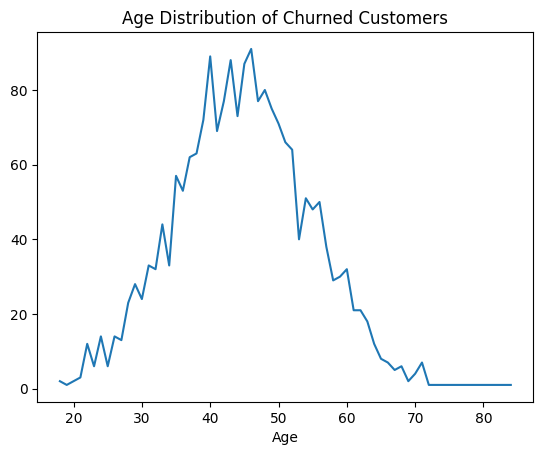

In [674]:
# Plotting
age_distribution_churned.plot(kind='line', title='Age Distribution of Churned Customers')
plt.show()

In [675]:
# Ananlysing tenure distribution of churned customers
tenure_distribution_churned = churn[churn['churned'] == 1]['Tenure'].value_counts().sort_index()
print("Tenure Distribution of Churned Customers:")
print(tenure_distribution_churned)

Tenure Distribution of Churned Customers:
Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: count, dtype: int64


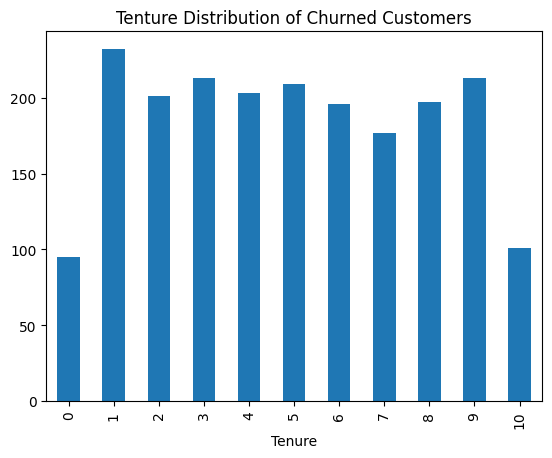

In [676]:
# Plotting
tenure_distribution_churned.plot(kind='bar', title='Tenture Distribution of Churned Customers')
plt.show()

In [677]:
# Analyzing churned customers by geography
churn_by_geography = churn.groupby('Geography')['churned'].mean()
print("Churn Rate by Geography:")
print(churn_by_geography)

Churn Rate by Geography:
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churned, dtype: float64


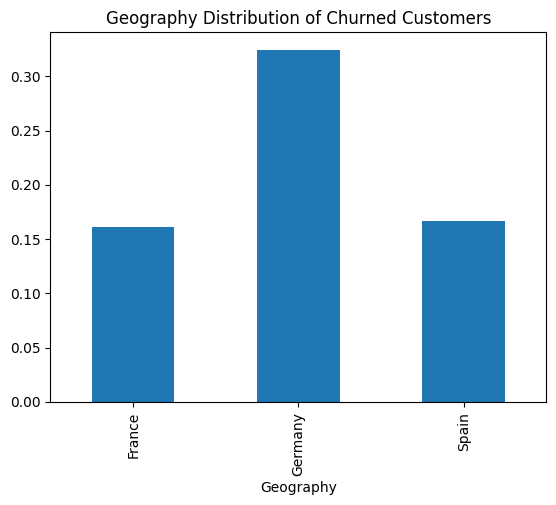

In [678]:
# Plotting
churn_by_geography .plot(kind='bar', title='Geography Distribution of Churned Customers')
plt.show()

# **Product Usage**

In [679]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  churned          10000 non-null  int64   
 14  AgeGroup         10000 non-null  category
dtypes: category(1), float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**1. Most Commonly Used Products or Services**

In [680]:
num_of_products_counts = churn['NumOfProducts'].value_counts().sort_index()

In [681]:
# Print and plot the distribution of number of products used
print("Distribution of Number of Products Used:")
print(num_of_products_counts)

Distribution of Number of Products Used:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


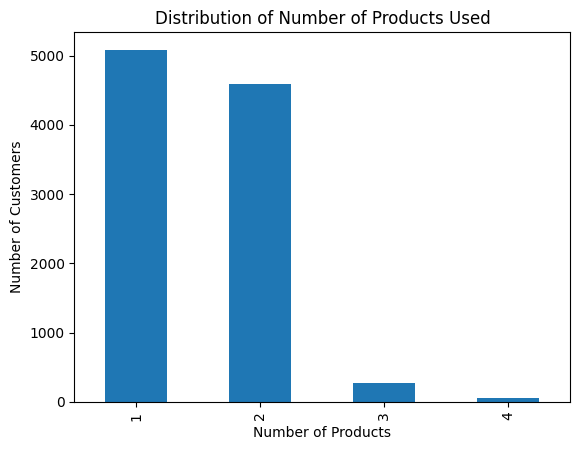

In [682]:
num_of_products_counts.plot(kind='bar', title='Distribution of Number of Products Used', xlabel='Number of Products', ylabel='Number of Customers')
plt.show()

**2. Usage Patterns of Different Customer Segments**

In [683]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


In [684]:
#To analyze usage patterns across different customer segments,
#we'll segment customers based on relevant features
#(such as demographic or behavioral data)
#analyze the distribution or trends within each segment:

#Segment customers based on a categorical variable
gender_usage = churn.groupby('Gender')['NumOfProducts'].mean()

In [685]:
# Print usage patterns by gender
print("Average Number of Products Used by Gender:")
print(gender_usage)

Average Number of Products Used by Gender:
Gender
Female    1.544134
Male      1.518600
Name: NumOfProducts, dtype: float64


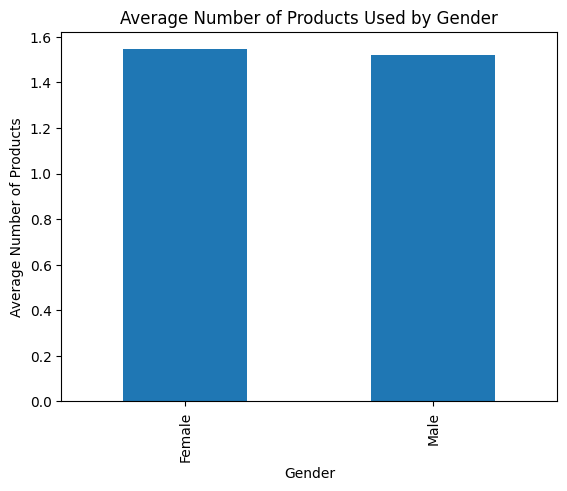

In [686]:
# Plotting
gender_usage.plot(kind='bar', title='Average Number of Products Used by Gender', xlabel='Gender', ylabel='Average Number of Products')
plt.show()

In [687]:
#Segment customers based on age groups
# Calculate average number of products used by age group
age_group_usage = churn.groupby('AgeGroup')['NumOfProducts'].mean()

In [688]:
# Print usage patterns by age group
print("Average Number of Products Used by Age Group:")
print(age_group_usage)

Average Number of Products Used by Age Group:
AgeGroup
0-20     1.428571
20-30    1.560930
30-40    1.539347
40-50    1.518717
50-60    1.481013
60+      1.509506
Name: NumOfProducts, dtype: float64


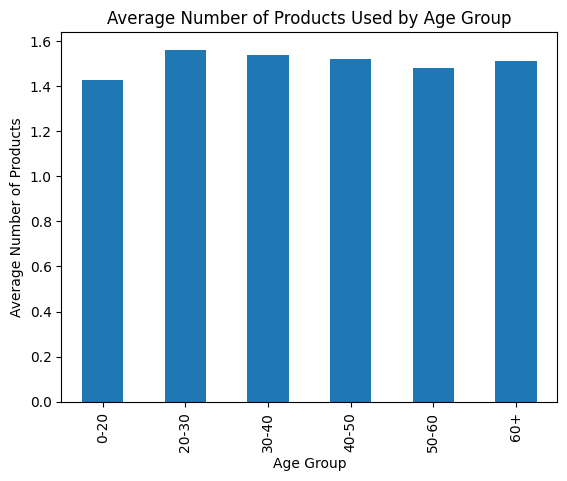

In [689]:
# Plotting
age_group_usage.plot(kind='bar', title='Average Number of Products Used by Age Group', xlabel='Age Group', ylabel='Average Number of Products')
plt.show()

# **Financial Analysis**

**1. Average Account Balance of Customers**

In [690]:
average_balance = churn['Balance'].mean()
print(f"Average Account Balance of Customers: {average_balance:.2f}")

Average Account Balance of Customers: 76485.89


**2. Compare the financial characteristics of churned vs. non-churned customers.**

In [691]:
financial_comparison = churn.groupby('churned')['Balance'].mean()
print("Comparison of Average Balance between Churned vs. Non-Churned Customers:")
print(financial_comparison)

Comparison of Average Balance between Churned vs. Non-Churned Customers:
churned
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


# **Predictive Modeling**

In [692]:
churn['churned'] = churn['churned'].astype('object')

In [693]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  churned          10000 non-null  object  
 14  AgeGroup         10000 non-null  category
dtypes: category(1), float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [694]:
#Checking Null Values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
AgeGroup           0
dtype: int64

In [695]:
#Checking Duplicated Values
churn.duplicated().sum()

0

In [696]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=churn[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Before Outlier Removing:  RowNumber


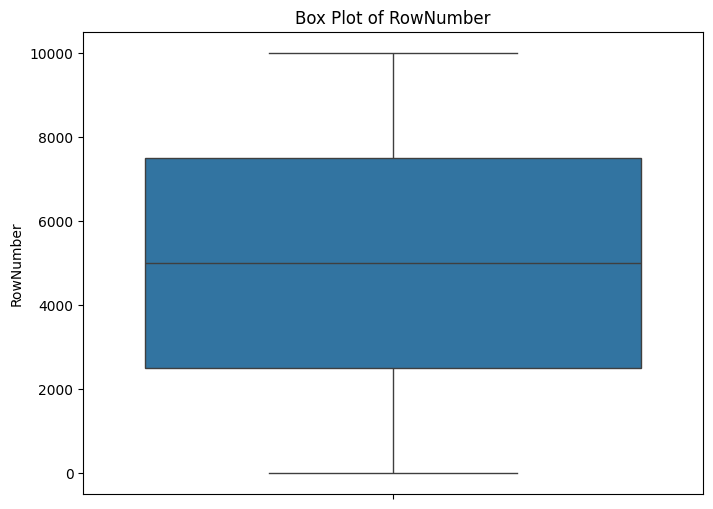

After Outlier Removing:  RowNumber


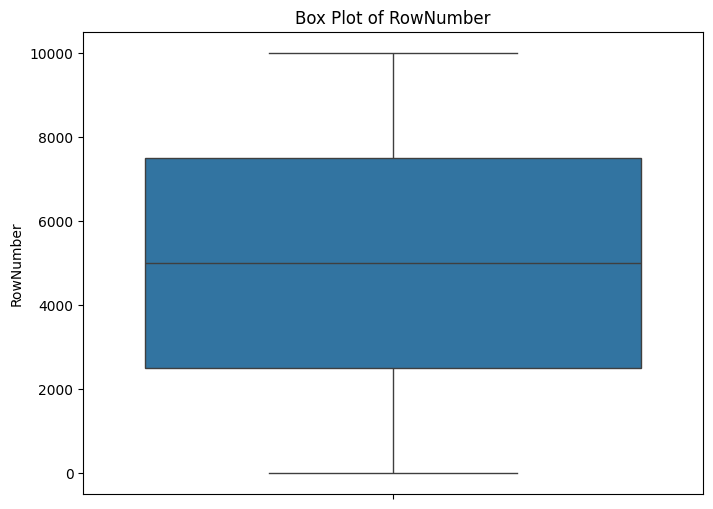

Before Outlier Removing:  CustomerId


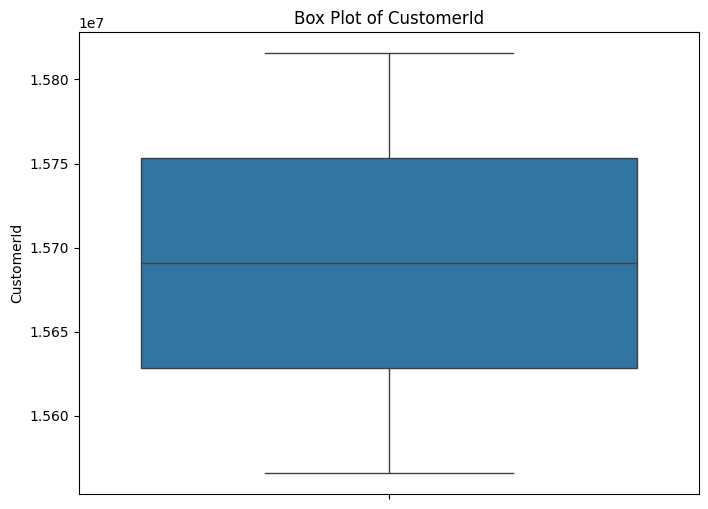

After Outlier Removing:  CustomerId


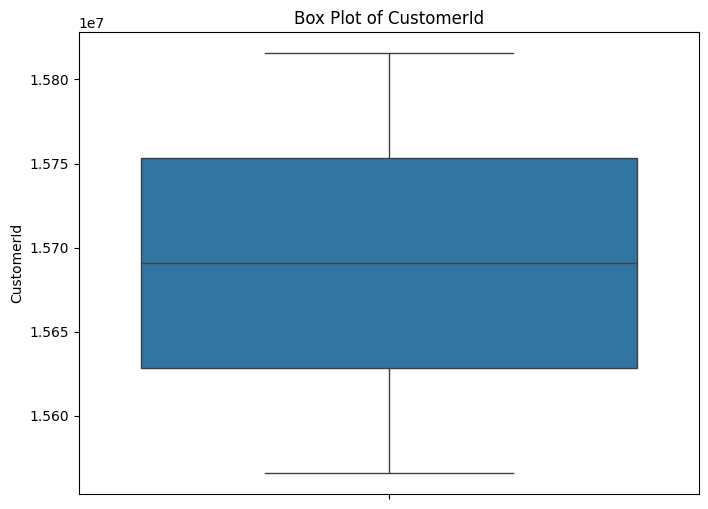

Before Outlier Removing:  CreditScore


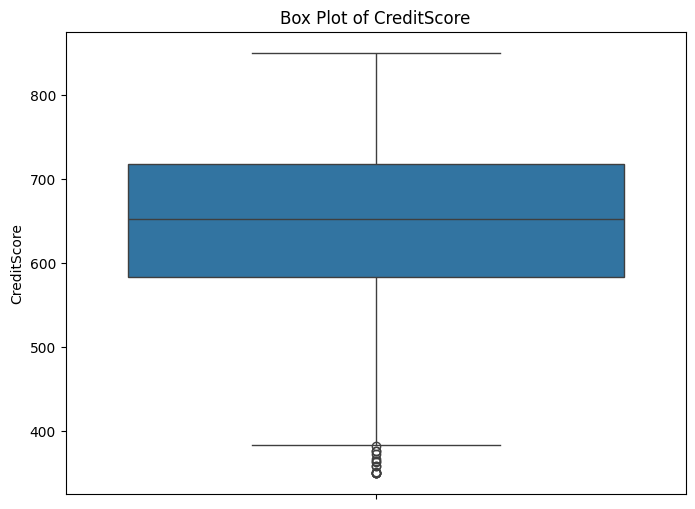

After Outlier Removing:  CreditScore


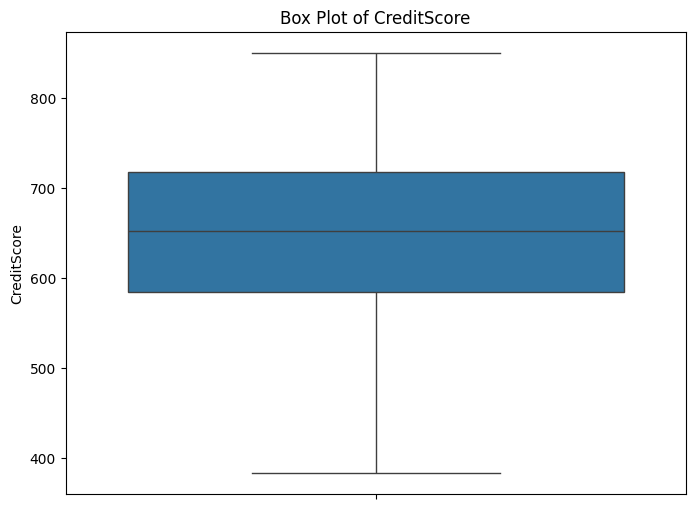

Before Outlier Removing:  Age


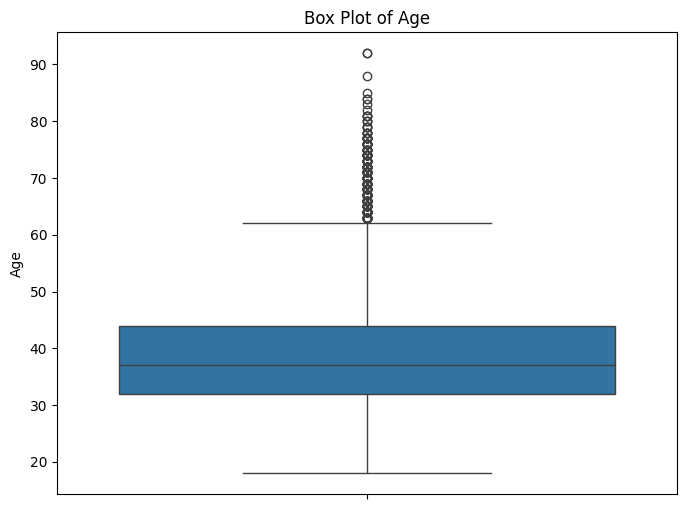

After Outlier Removing:  Age


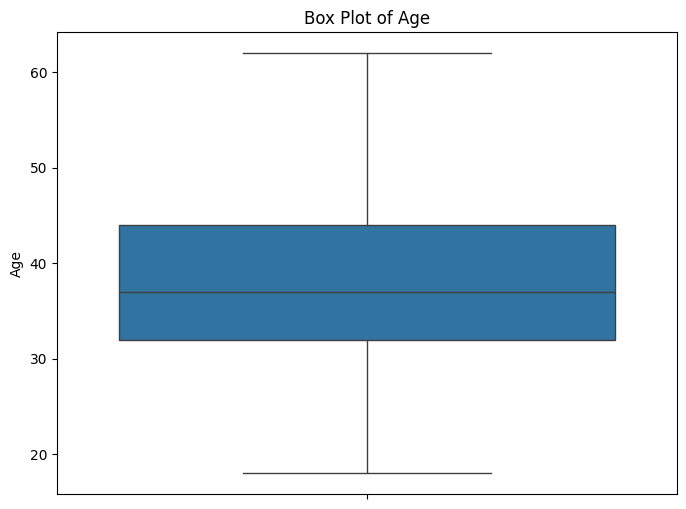

Before Outlier Removing:  Tenure


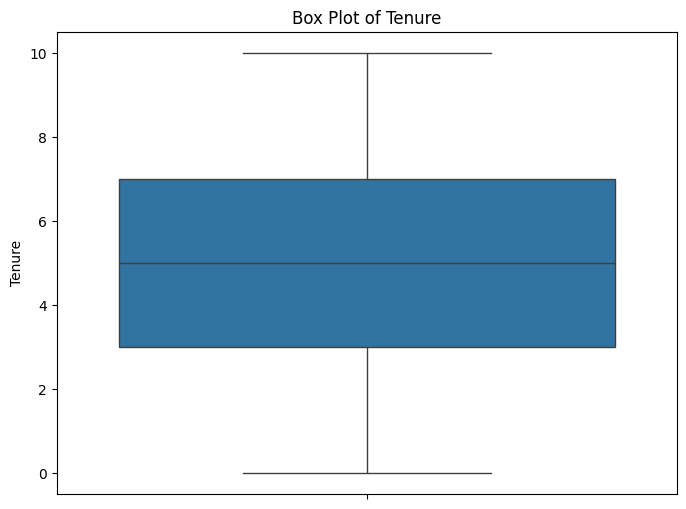

After Outlier Removing:  Tenure


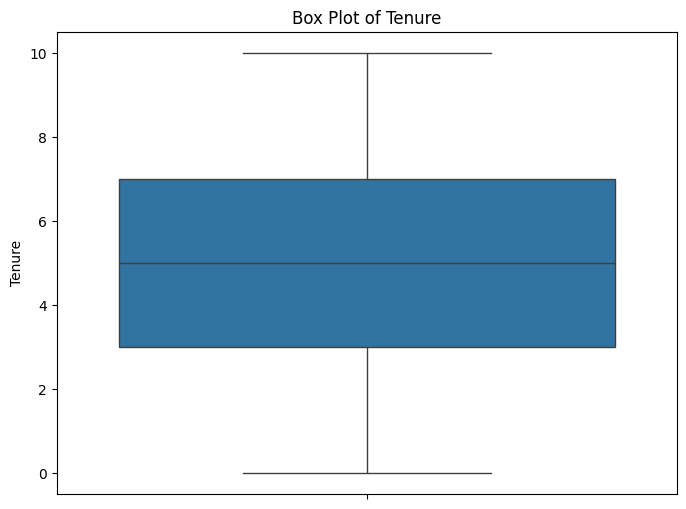

Before Outlier Removing:  Balance


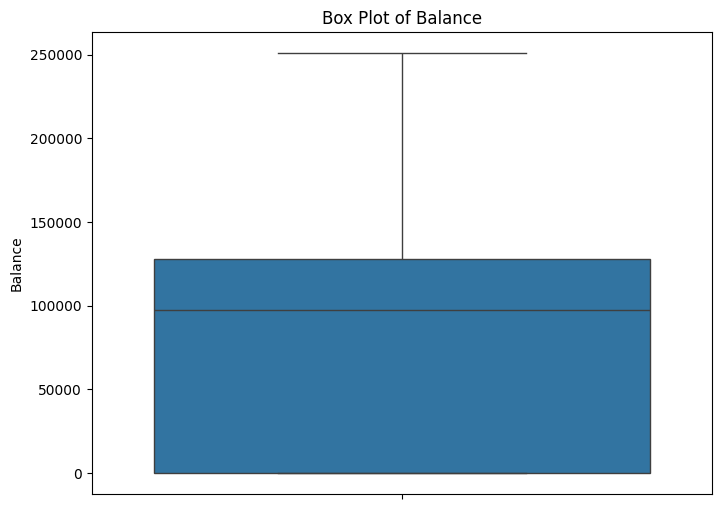

After Outlier Removing:  Balance


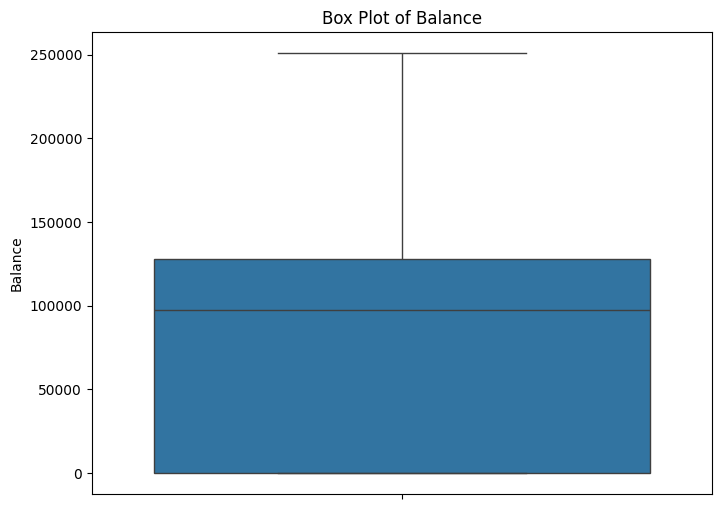

Before Outlier Removing:  NumOfProducts


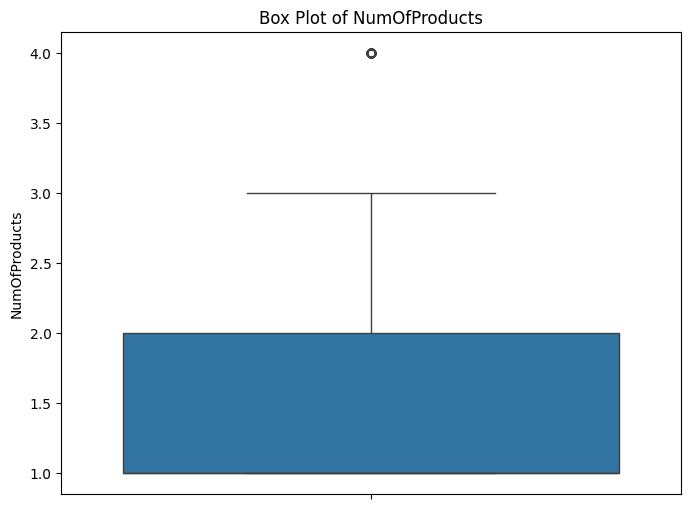

After Outlier Removing:  NumOfProducts


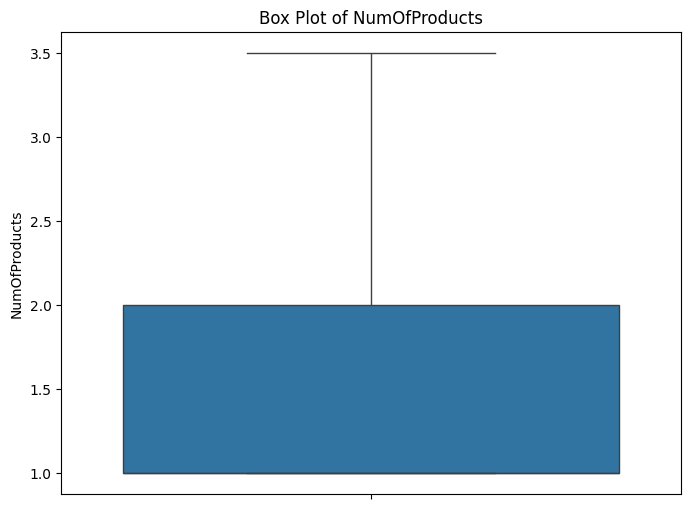

Before Outlier Removing:  HasCrCard


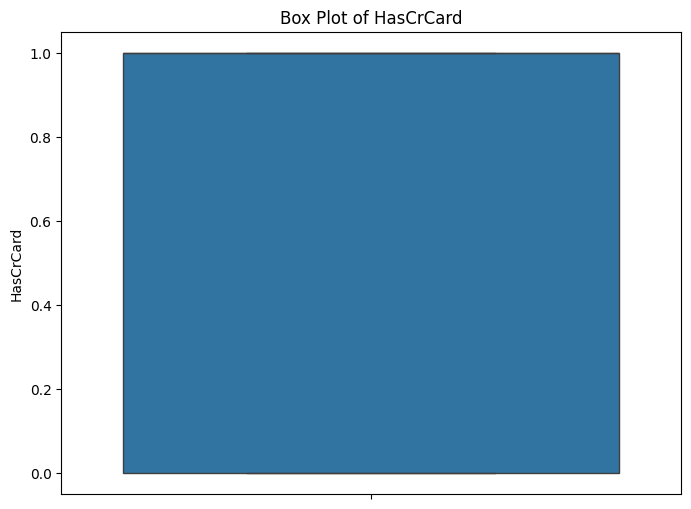

After Outlier Removing:  HasCrCard


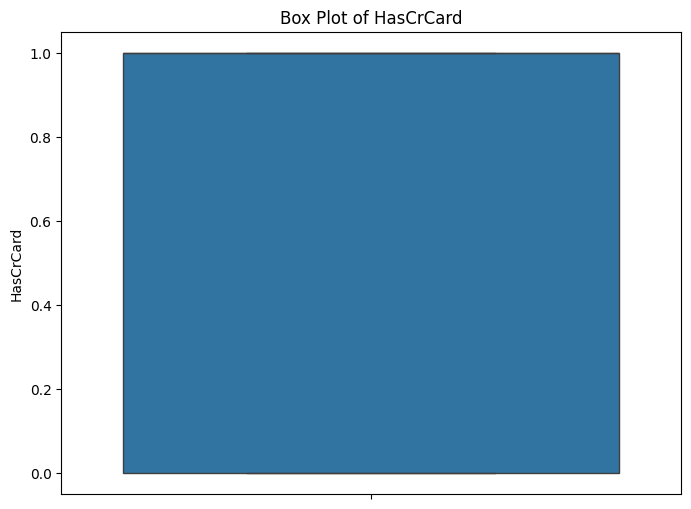

Before Outlier Removing:  IsActiveMember


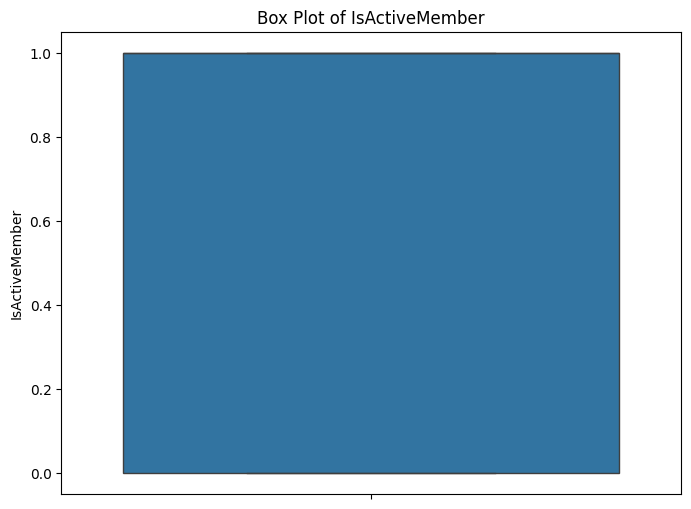

After Outlier Removing:  IsActiveMember


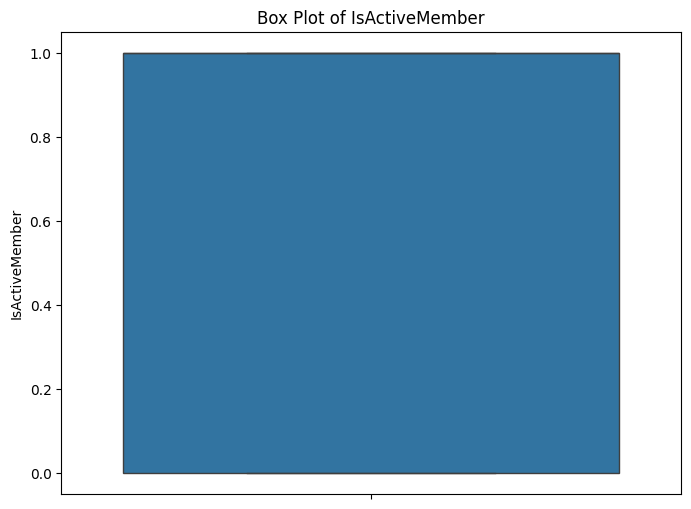

Before Outlier Removing:  EstimatedSalary


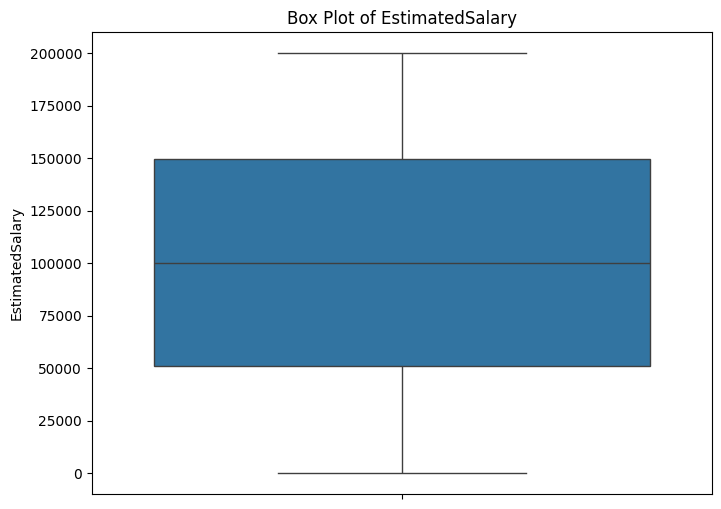

After Outlier Removing:  EstimatedSalary


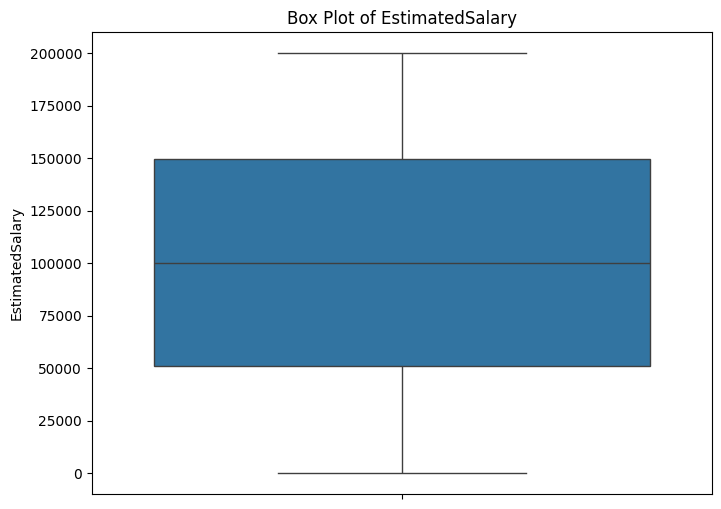

In [697]:
#outlier is removed using iqr method
for column in churn:

  if churn[column].dtype == 'int' or churn[column].dtype == 'float':
      print("Before Outlier Removing: ",column)

      boxplot(column)

      print("After Outlier Removing: ",column)

      q1 = churn[column].quantile(0.25)
      q3 = churn[column].quantile(0.75)
      iqr = q3 - q1

      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      churn.loc[(churn[column] < lower_bound),column] = lower_bound
      churn.loc[(churn[column] > upper_bound),column] = upper_bound

      boxplot(column)



In [698]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [699]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [700]:
#converting categorical variables into numeric values using label encoding
encoding_mapping = {}
for column in churn:
  if churn[column].dtype == 'object':
    print(column)
    churn[column] = label.fit_transform(churn[column])
    encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

Surname
Geography
Gender
churned


In [701]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc

In [702]:
#data is assigned into independent(X) and dependent(y) variables
X = churn.drop(['churned','RowNumber','CustomerId','Surname','AgeGroup'], axis=1)
y = churn['churned']

In [703]:
#scaling the variables using standard scaler
X = scalerx.fit_transform(X)

In [704]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [705]:
y_train.unique()

array([0, 1])

In [706]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  int64   
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  int64   
 5   Gender           10000 non-null  int64   
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  HasCrCard        10000 non-null  float64 
 11  IsActiveMember   10000 non-null  float64 
 12  EstimatedSalary  10000 non-null  float64 
 13  churned          10000 non-null  int64   
 14  AgeGroup         10000 non-null  category
dtypes: category(1), float64(6), int64(8)
memory usage: 1.1 MB


**Logistic Regression**

In [707]:
log_model = LogisticRegression()

#training the model
log_model.fit(X_train, y_train)

#model is predicted with test data
log_pred = log_model.predict(X_test)

Accuracy :  0.823


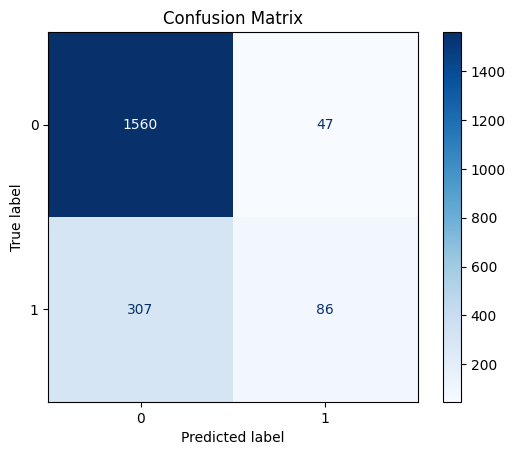

In [708]:

#computing the accuracy of the model
log_accuracy = accuracy_score(y_test, log_pred)
print("Accuracy : ", log_accuracy )

# Compute the confusion matrix
log_cm = confusion_matrix(y_test, log_pred)

# Plot the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_model.classes_)
log_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [709]:
# Print the classification report
print(classification_report(y_test, log_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.97      0.90      1607
    Survived       0.65      0.22      0.33       393

    accuracy                           0.82      2000
   macro avg       0.74      0.59      0.61      2000
weighted avg       0.80      0.82      0.79      2000



In [710]:
def curve(pred):
  # Precision-Recall Curve
  precision, recall, _ = precision_recall_curve(y_test, pred)
  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, marker='.')
  plt.title('Precision-Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.show()

  # ROC Curve
  fpr, tpr, _ = roc_curve(y_test, pred)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.show()

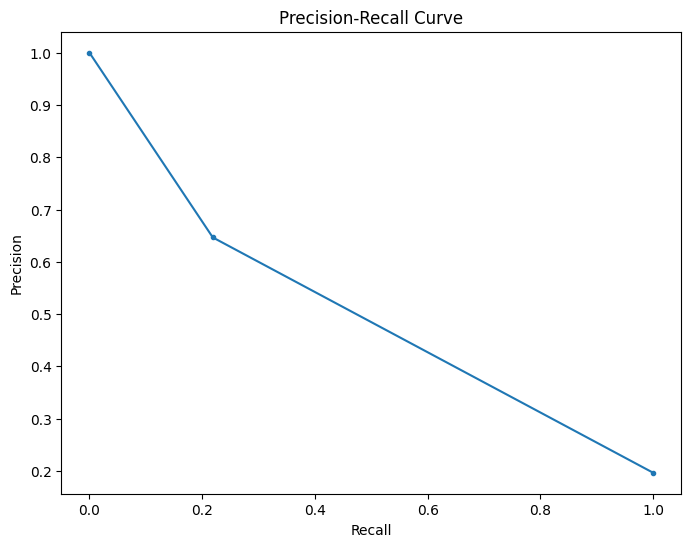

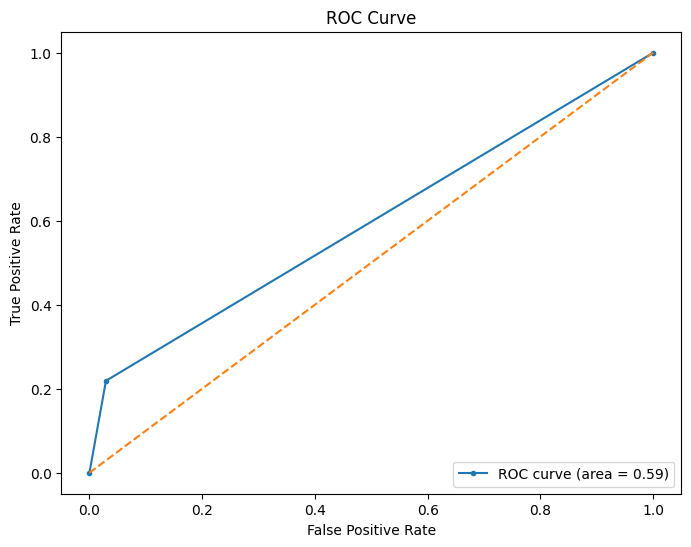

In [711]:
curve(log_pred)

**KNeighborsClassifier**

In [712]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

Accuracy :  0.8355


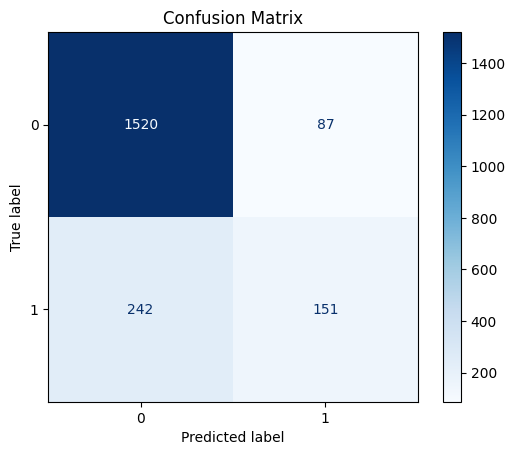

In [713]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : ", knn_accuracy )

knn_cm = confusion_matrix(y_test, knn_pred)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [714]:
# Print the classification report
print(classification_report(y_test, knn_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.86      0.95      0.90      1607
    Survived       0.63      0.38      0.48       393

    accuracy                           0.84      2000
   macro avg       0.75      0.67      0.69      2000
weighted avg       0.82      0.84      0.82      2000



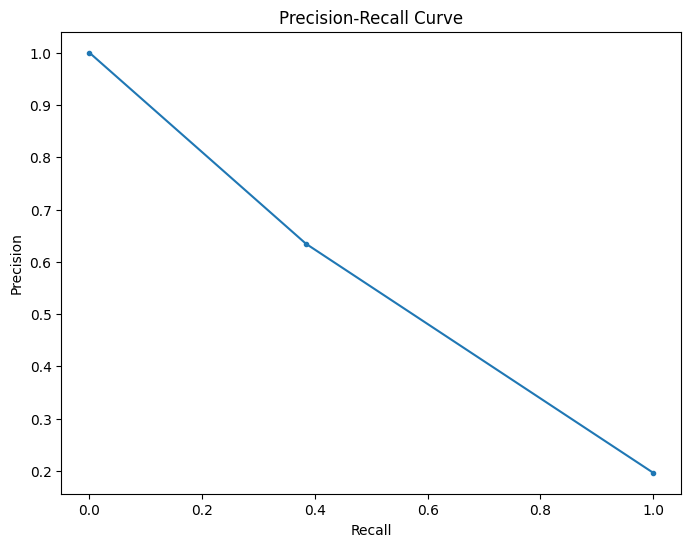

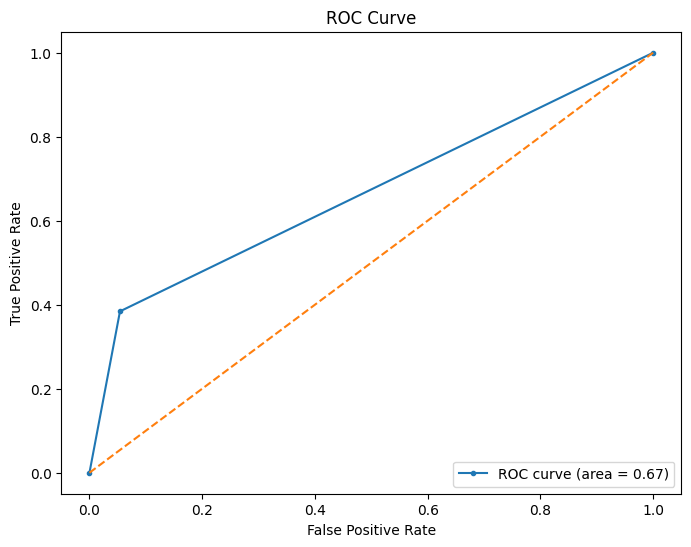

In [715]:
curve(knn_pred)

**DecisionTreeClassifier**

In [716]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy :  0.7865


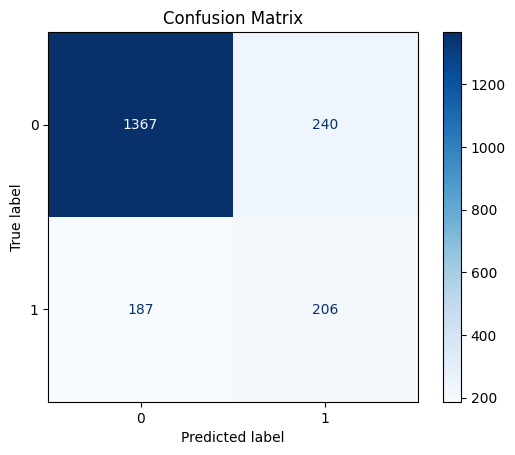

In [717]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy )

dt_cm = confusion_matrix(y_test, dt_pred)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [718]:
# Print the classification report
print(classification_report(y_test, dt_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.85      0.86      1607
    Survived       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



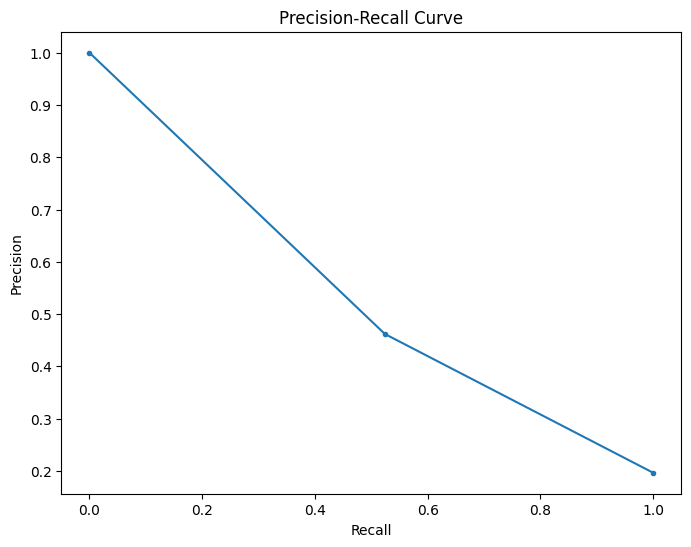

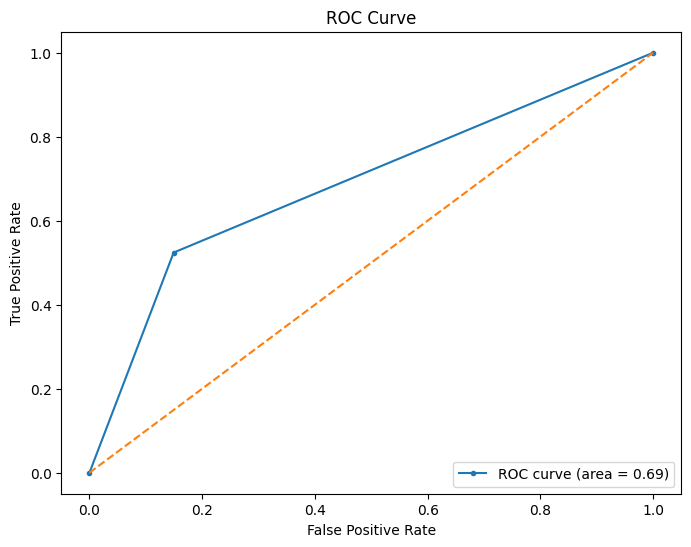

In [719]:
curve(dt_pred)

**RandomForestClassifier**

In [720]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Accuracy :  0.868


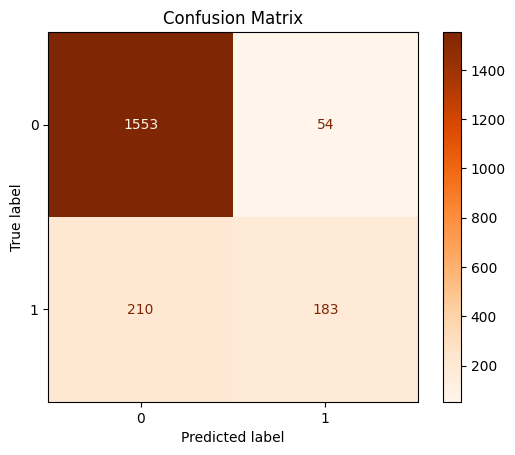

In [721]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy : ", rf_accuracy)

rf_cm = confusion_matrix(y_test,rf_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
rf_disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

In [722]:
# Print the classification report
print(classification_report(y_test, rf_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.97      0.92      1607
    Survived       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



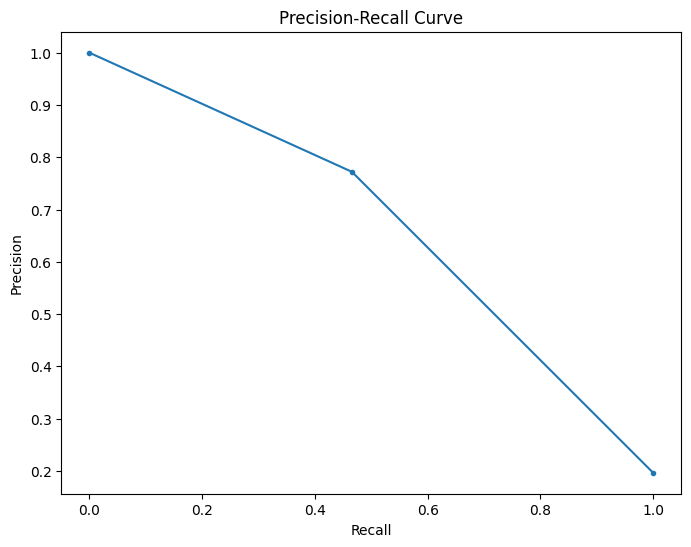

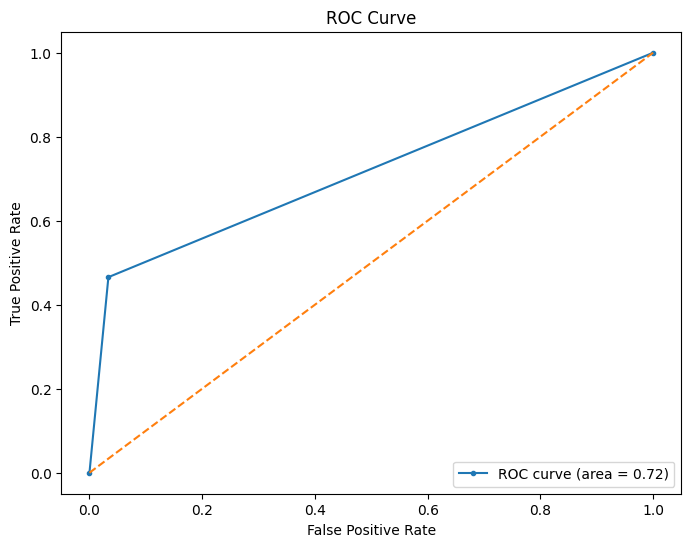

In [723]:
curve(rf_pred)

**GradientBoostingClassifier**

In [724]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Accuracy :  0.865


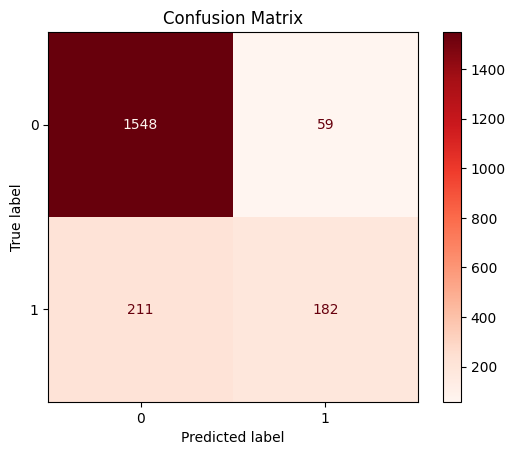

In [725]:
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy : ", gb_accuracy)

gb_cm = confusion_matrix(y_test,gb_pred)

gb_disp = ConfusionMatrixDisplay(confusion_matrix = gb_cm, display_labels = gb_model.classes_)
gb_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [726]:
# Print the classification report
print(classification_report(y_test, gb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.96      0.92      1607
    Survived       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



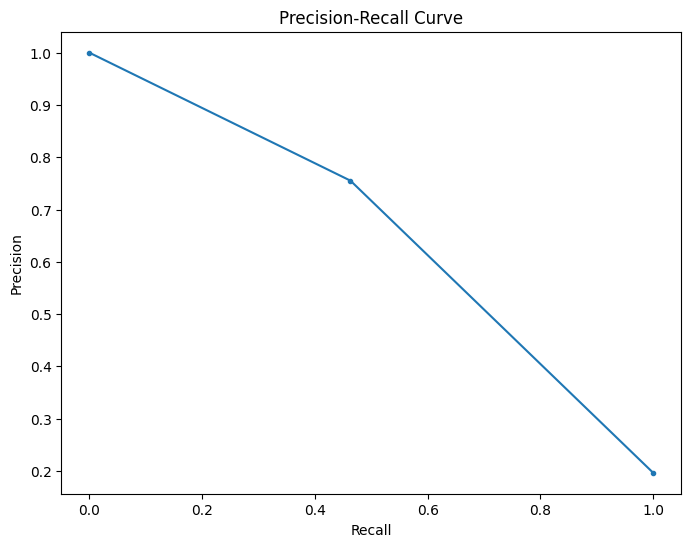

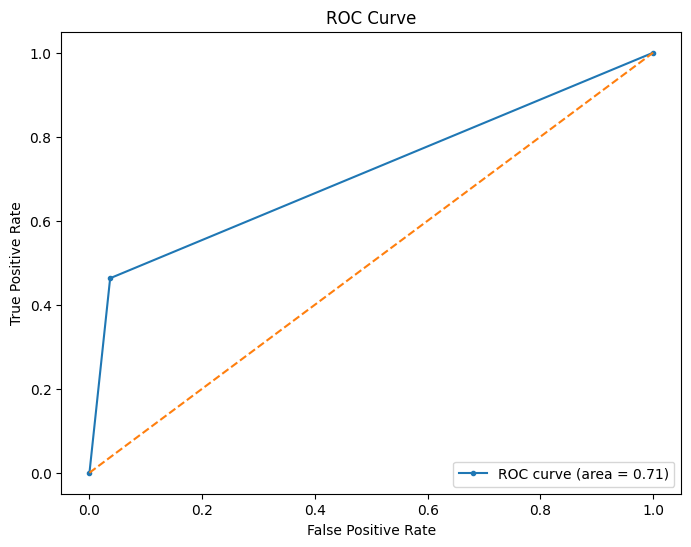

In [727]:
curve(gb_pred)

**AdaBoostClassifier**

In [728]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

Accuracy :  0.855


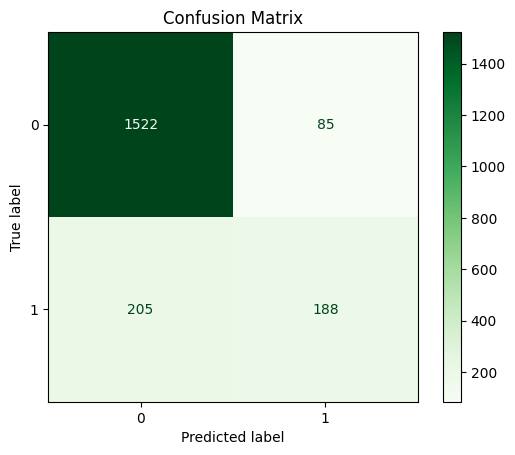

In [729]:
ab_accuracy = accuracy_score(y_test,ab_pred)
print("Accuracy : ", ab_accuracy)

ab_cm = confusion_matrix(y_test,ab_pred)

ab_disp = ConfusionMatrixDisplay(confusion_matrix = ab_cm, display_labels = ab_model.classes_)
ab_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [730]:
# Print the classification report
print(classification_report(y_test, ab_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.95      0.91      1607
    Survived       0.69      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



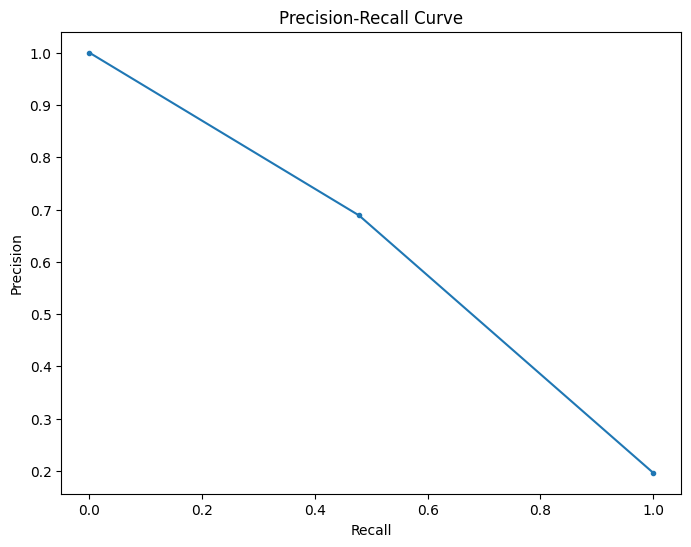

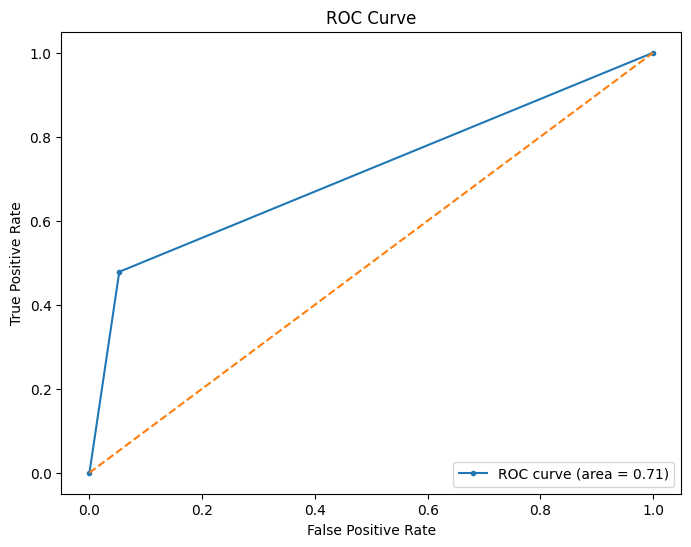

In [731]:
curve(ab_pred)

**XGBClassifier**

In [732]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Accuracy :  0.862


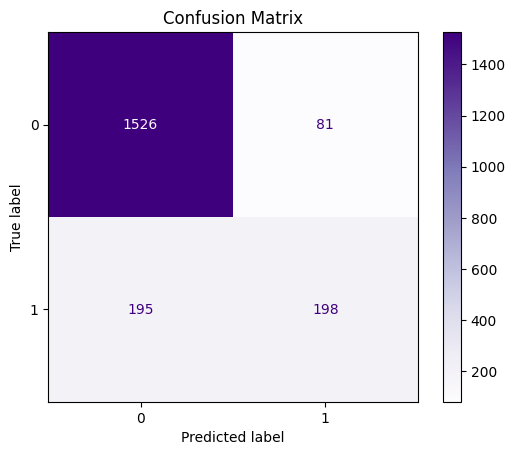

In [733]:
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("Accuracy : ", xgb_accuracy)

xgb_cm = confusion_matrix(y_test,xgb_pred)

xgb_disp = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_model.classes_)
xgb_disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

In [734]:
# Print the classification report
print(classification_report(y_test, xgb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.89      0.95      0.92      1607
    Survived       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



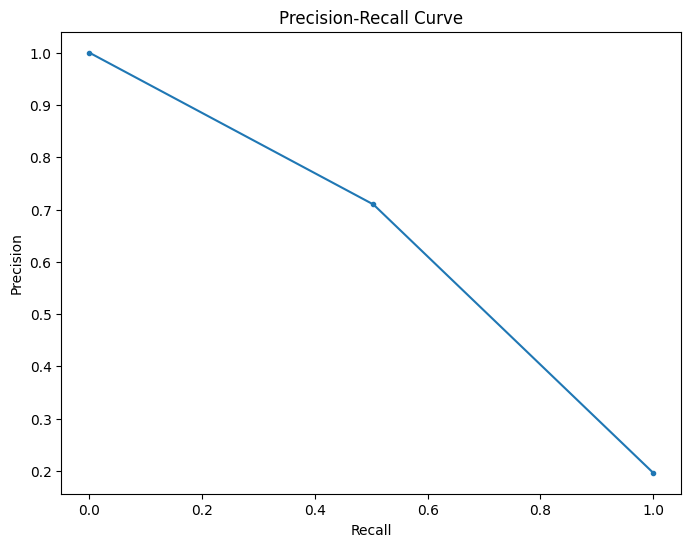

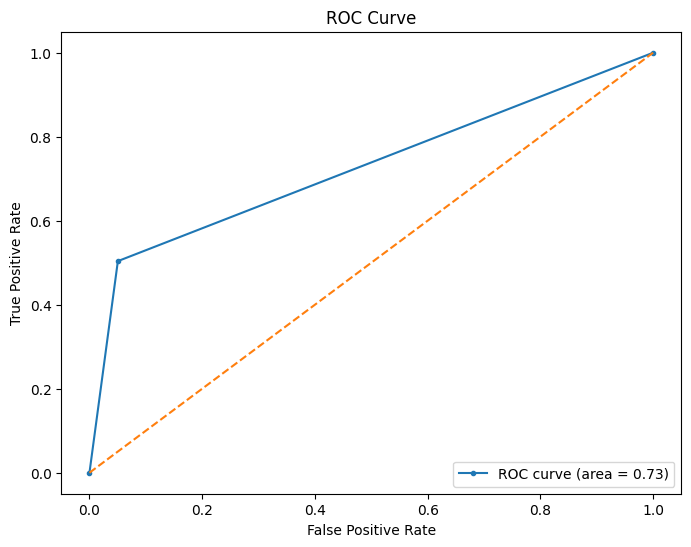

In [735]:
curve(xgb_pred)

**SVC**

In [736]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

Accuracy :  0.8595


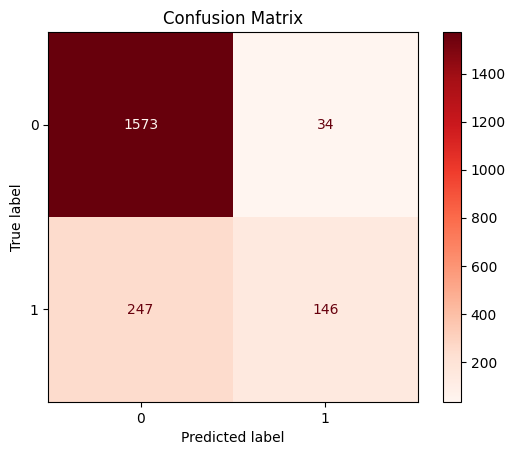

In [737]:
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Accuracy : ", svc_accuracy)

svc_cm = confusion_matrix(y_test,svc_pred)

svc_disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = svc_model.classes_)
svc_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [738]:
# Print the classification report
print(classification_report(y_test, svc_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.86      0.98      0.92      1607
    Survived       0.81      0.37      0.51       393

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



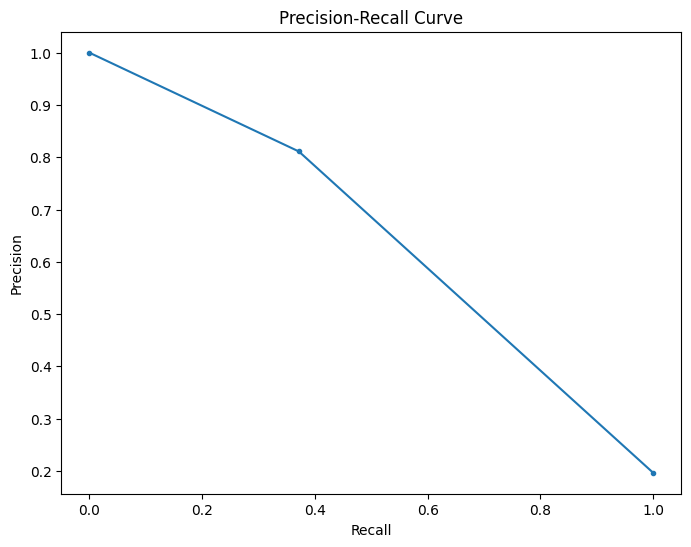

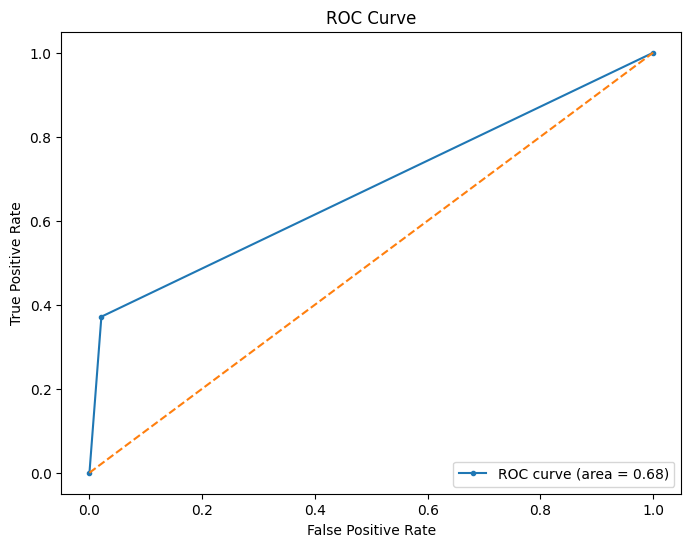

In [739]:
curve(svc_pred)

**GaussianNB**

In [740]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

Accuracy :  0.8345


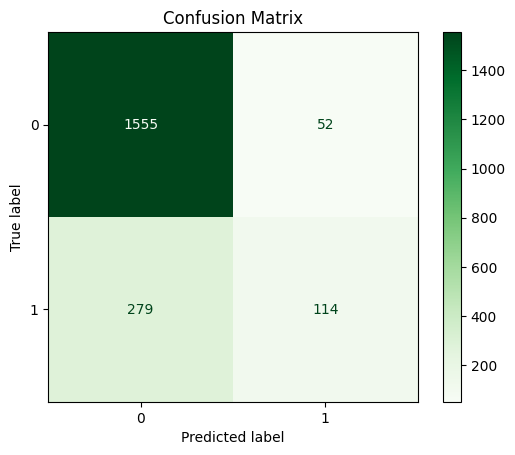

In [741]:
gnb_accuracy = accuracy_score(y_test,gnb_pred)
print("Accuracy : ", gnb_accuracy)

gnb_cm = confusion_matrix(y_test,gnb_pred)

gnb_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_cm, display_labels = gnb_model.classes_)
gnb_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [742]:
# Print the classification report
print(classification_report(y_test, gnb_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.97      0.90      1607
    Survived       0.69      0.29      0.41       393

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.66      2000
weighted avg       0.82      0.83      0.81      2000



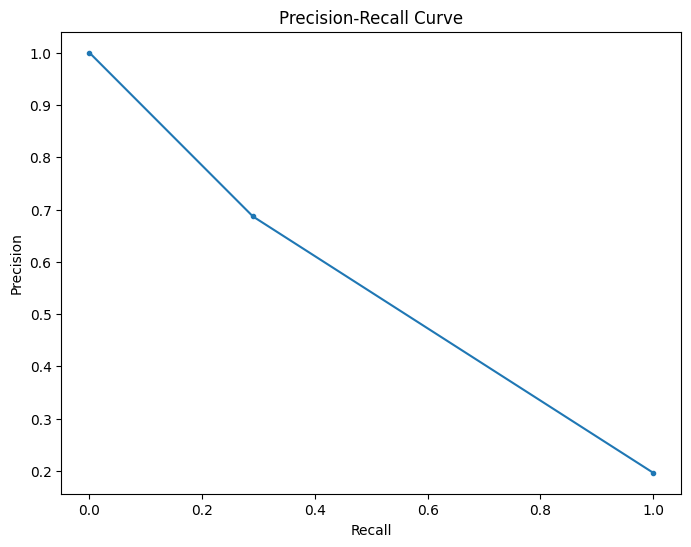

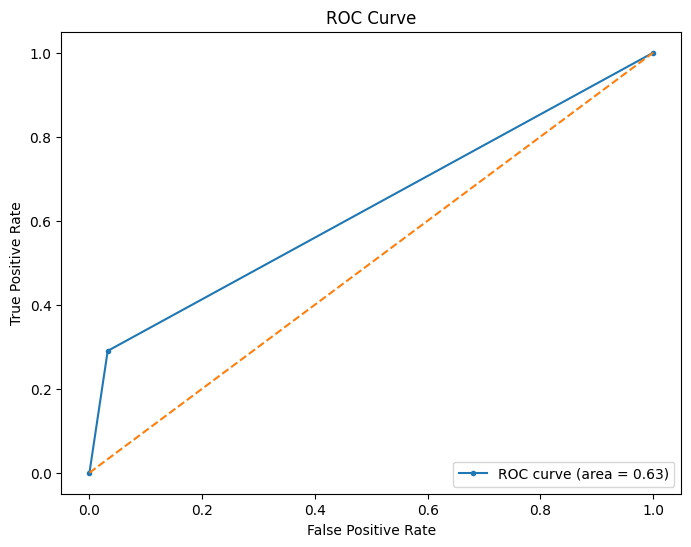

In [743]:
curve(gnb_pred)

**MLPClassifier**

In [744]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy :  0.862


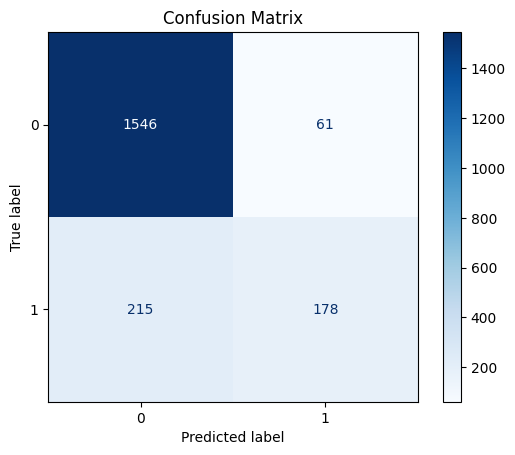

In [745]:
mlp_accuracy = accuracy_score(y_test,mlp_pred)
print("Accuracy : ", mlp_accuracy)

mlp_cm = confusion_matrix(y_test,mlp_pred)

mlp_disp = ConfusionMatrixDisplay(confusion_matrix = mlp_cm, display_labels = mlp_model.classes_)
mlp_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [746]:
# Print the classification report
print(classification_report(y_test, mlp_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.96      0.92      1607
    Survived       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



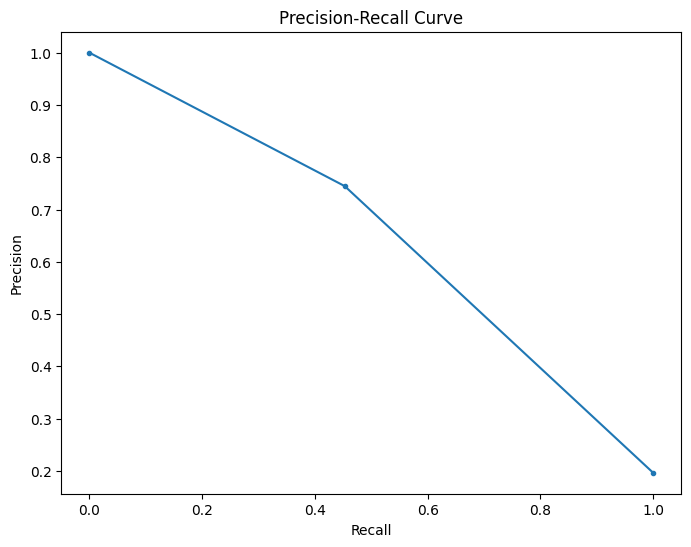

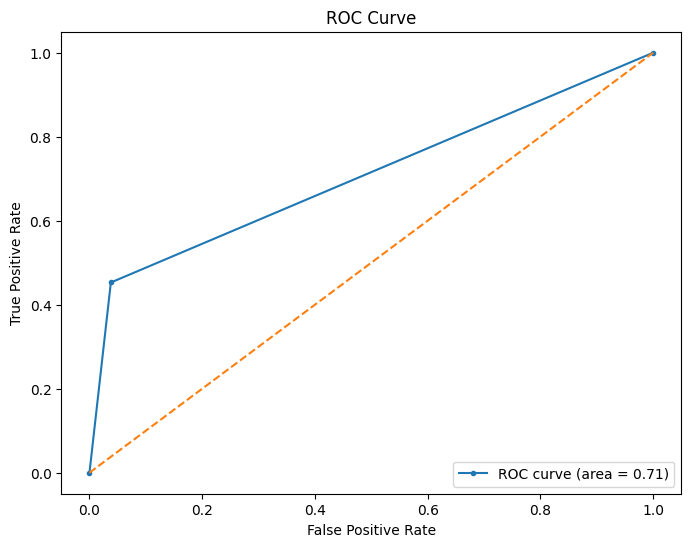

In [747]:
curve(mlp_pred)

**COMPARISON OF MODELS**

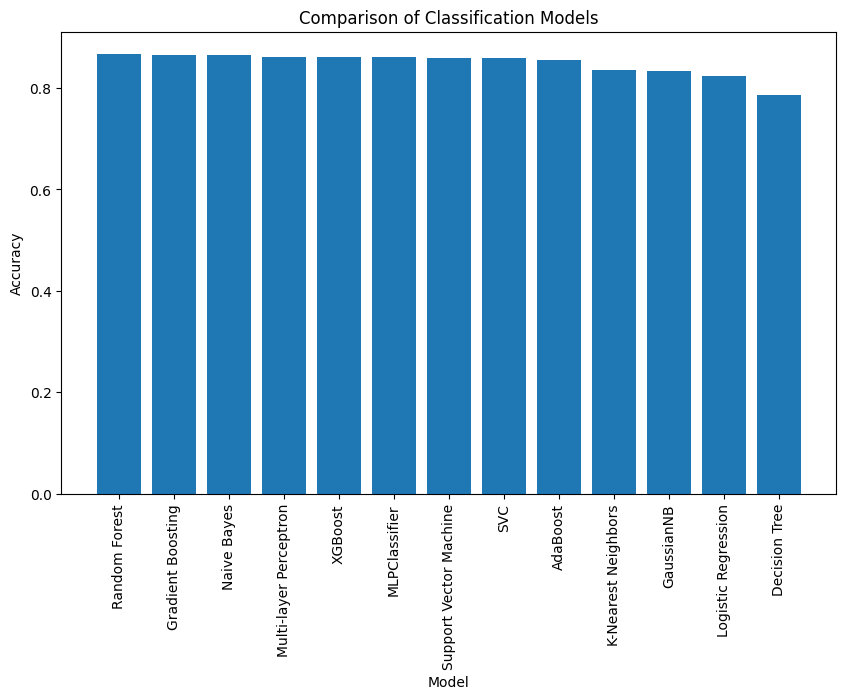

In [748]:

# Create a dictionary to store model names and their R2 values
models_accuracy = {
    "Logistic Regression": log_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Support Vector Machine": svc_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy,
    "AdaBoost": ab_accuracy,
    "Naive Bayes": gb_accuracy,
    "Multi-layer Perceptron": mlp_accuracy,
    "XGBoost": xgb_accuracy,
    "GaussianNB": gnb_accuracy,
    "SVC": svc_accuracy,
    "MLPClassifier": mlp_accuracy,


}

# Sort models by descending order of accuracy
sorted_models_accuracy = dict(sorted(models_accuracy.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_accuracy.keys(), sorted_models_accuracy.values())
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()
